In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import os

In [2]:
from hyperion.model import AnalyticalYSOModel, ModelOutput
from hyperion.util.constants import rsun, lsun, msun, au, pc, yr, c

`run_model.py`: vary number of photons, grid resolution.  
* $200 \times 100 \times 5$ grid:  
    * 1e3, 2e3, 5e3 photons   
    * 1e4, 2e4, 5e4 photons  
    * 1e5, 2e5 photons  
    * 1e6 photons    
* 2e4 photons: 
    * $100 \times 50 \times 3$ grid  
    * $200 \times 100 \times 5$ grid  
    * $300 \times 150 \times 8$ grid  
    * $400 \times 200 \times 10$ grid   
* 2e5 photons:  
    * $400 \times 200 \times 10$ grid  

In [3]:
basedir = '/home/nina/Programming/Python/hyperion/'

In [4]:
def plot_all_inclinations(fname_in):

    mo = ModelOutput(fname_in)

    # Viewing angles.
    inclinations = np.linspace(0.0, 90.0, 10)

    for i, inc in enumerate(inclinations):
    
        # Set up figure.
        fig = plt.figure(figsize=(10, 8))
        ax  = fig.add_subplot(1, 1, 1)
    
        # Total SED.
        sed = mo.get_sed(aperture=-1, distance=300.0*pc, inclination=i)
        ax.loglog(sed.wav, sed.val, color='black', lw=3, alpha=0.5, label='all components')
    
        # Direct stellar photons.
        sed = mo.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='source_emit')
        ax.loglog(sed.wav, sed.val, color='blue', label='direct stellar photons')
    
        # Scattered stellar photons.
        sed = mo.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='source_scat')
        ax.loglog(sed.wav, sed.val, color='teal', label='scattered stellar photons')
    
        # Direct dust photons.
        sed = mo.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='dust_emit')
        ax.loglog(sed.wav, sed.val, color='red', label='direct dust photons')
    
        # Scattered dust photons.
        sed = mo.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='dust_scat')
        ax.loglog(sed.wav, sed.val, color='orange', label='scattered dust photons')
    
        ax.set_xlim(0.5, 2000.0)
        ax.set_ylim(2.0e-15, 1.0e-8)
        ax.set_xlabel(r'$\lambda$ [$\mu$m]')
        ax.set_ylabel(r'$\lambda F_\lambda}$ [erg/cm$^2/s$]')
        ax.set_title('SED components (inclination = {0:d})'.format(int(inc)))
        ax.legend()
    
        plt.show()

In [5]:
def plot_side_by_side(fname1, fname2, txt1, txt2):
    
    mo1 = ModelOutput(fname1); mo2 = ModelOutput(fname2)

    # Viewing angles.
    inclinations = np.linspace(0.0, 90.0, 10)

    for i, inc in enumerate(inclinations):
        
        # Set up figure.
        fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(20.0, 8.0))
        
        # Total SED.
        sed1 = mo1.get_sed(aperture=-1, distance=300.0*pc, inclination=i)
        sed2 = mo2.get_sed(aperture=-1, distance=300.0*pc, inclination=i)
        axs[0].loglog(sed1.wav, sed1.val, color='black', lw=3, alpha=0.5, label='all components')
        axs[1].loglog(sed2.wav, sed2.val, color='black', lw=3, alpha=0.5, label='all components')
    
        # Direct stellar photons.
        sed1 = mo1.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='source_emit')
        sed2 = mo2.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='source_emit')
        axs[0].loglog(sed1.wav, sed1.val, color='blue', label='direct stellar photons')
        axs[1].loglog(sed2.wav, sed2.val, color='blue', label='direct stellar photons')
    
        # Scattered stellar photons.
        sed1 = mo1.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='source_scat')
        sed2 = mo2.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='source_scat')
        axs[0].loglog(sed1.wav, sed1.val, color='teal', label='scattered stellar photons')
        axs[1].loglog(sed2.wav, sed2.val, color='teal', label='scattered stellar photons')
    
        # Direct dust photons.
        sed1 = mo1.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='dust_emit')
        sed2 = mo2.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='dust_emit')
        axs[0].loglog(sed1.wav, sed1.val, color='red', label='direct dust photons')
        axs[1].loglog(sed2.wav, sed2.val, color='red', label='direct dust photons')
    
        # Scattered dust photons.
        sed1 = mo1.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='dust_scat')
        sed2 = mo2.get_sed(aperture=-1, distance=300.0*pc, inclination=i,
                         component='dust_scat')
        axs[0].loglog(sed1.wav, sed1.val, color='orange', label='scattered dust photons')
        axs[1].loglog(sed2.wav, sed2.val, color='orange', label='scattered dust photons')
        
        for ax in axs:
        
            ax.set_xlim(0.5, 2000.0)
            ax.set_ylim(2.0e-15, 1.0e-8)
            ax.set_xlabel(r'$\lambda$ [$\mu$m]', fontsize='x-large')
            ax.set_ylabel(r'$\lambda F_\lambda}$ [erg/cm$^2/s$]', fontsize='x-large')
            ax.set_title('SED components (inclination = {0:d})'.format(int(inc)), fontsize='xx-large')
            ax.legend()
            
        axs[0].annotate(txt1, xy=(0.05, 0.8), xytext=(0.05, 0.8), xycoords='axes fraction',
                        fontsize='xx-large')
        axs[1].annotate(txt2, xy=(0.05, 0.8), xytext=(0.05, 0.8), xycoords='axes fraction',
                        fontsize='xx-large')
        
        plt.show()

In [6]:
def plot_model_seds(models, labels, cmap):

    # Set up figure.
    fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(20.0, 8.0))
    
    #cm = plt.get_cmap('inferno')
    cm = cmap
    c_norm  = mpl.colors.Normalize(vmin=0, vmax=(len(models)-1))
    scalar_map = mpl.cm.ScalarMappable(norm=c_norm, cmap=cm)
    
    idx = 0
    
    for model, label in zip(models, labels):
        
        c_val = scalar_map.to_rgba((len(models)-1) - idx)
        
        mo = ModelOutput(os.path.join(basedir, model))
        
        # Total SED, viewed at 0 degrees (pole-on) and 90 degrees (edge-on).
        sed1 = mo.get_sed(aperture=-1, distance=300.0*pc, inclination=0)
        sed2 = mo.get_sed(aperture=-1, distance=300.0*pc, inclination=9)
        
        axs[0].loglog(sed1.wav, sed1.val, color=c_val, label=label)
        axs[1].loglog(sed2.wav, sed2.val, color=c_val, label=label)
        
        for ax in axs:
        
            ax.set_xlim(0.5, 2000.0)
            ax.set_ylim(2.0e-15, 1.0e-8)
            ax.set_xlabel(r'$\lambda$ [$\mu$m]', fontsize='x-large')
            ax.set_ylabel(r'$\lambda F_\lambda}$ [erg/cm$^2/s$]', fontsize='x-large')
            ax.legend()
            
        axs[0].set_title('inclination = 0 degrees (pole-on)', fontsize='xx-large')
        axs[1].set_title('inclination = 90 degrees (edge-on)', fontsize='xx-large')
        
        idx += 1
        
    plt.show()

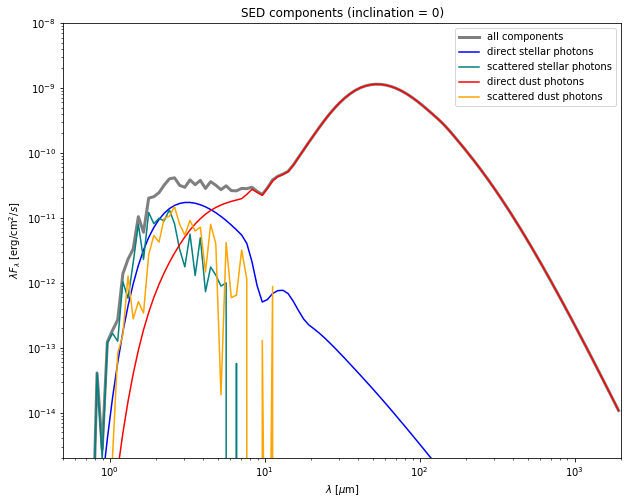

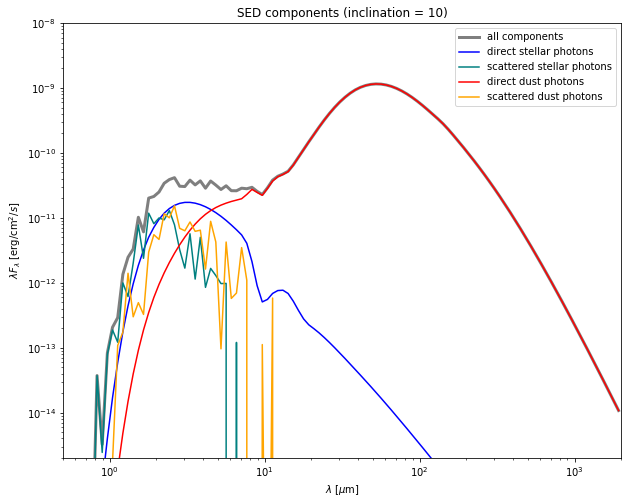

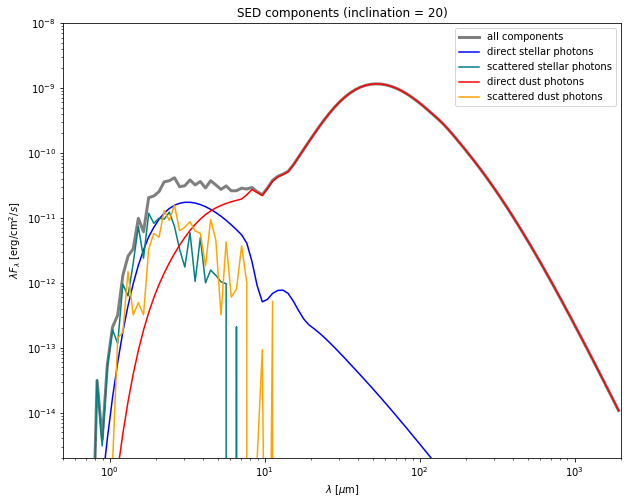

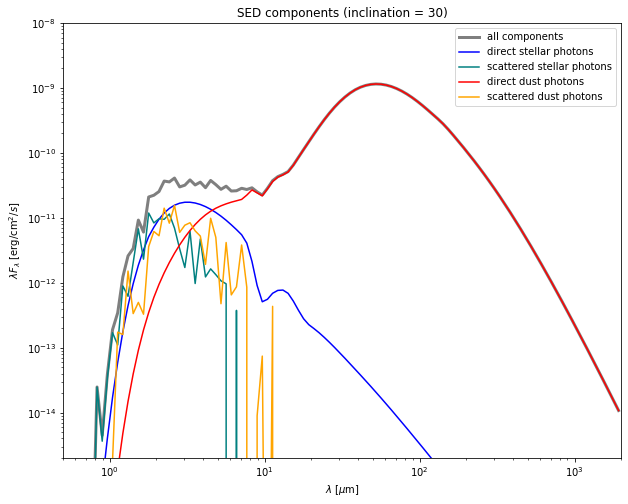

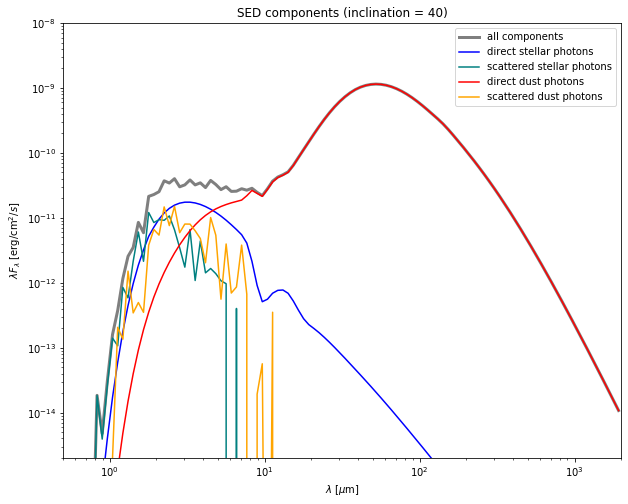

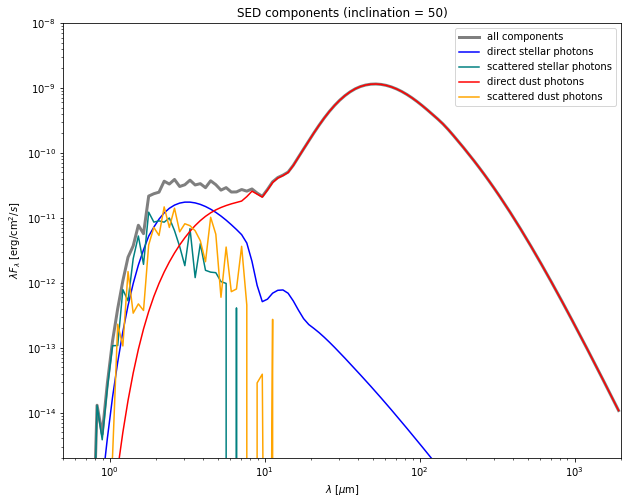

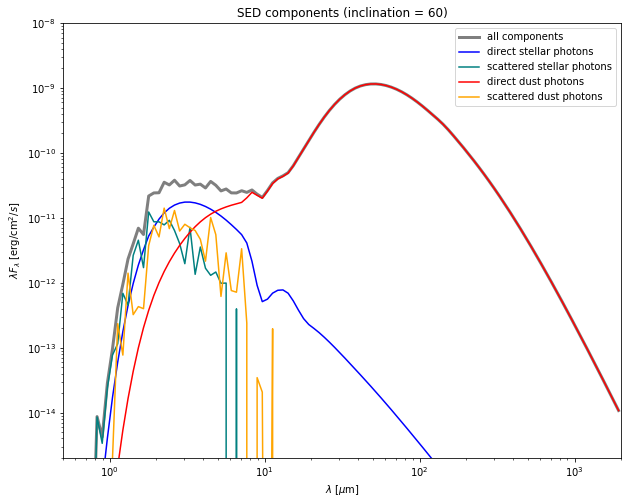

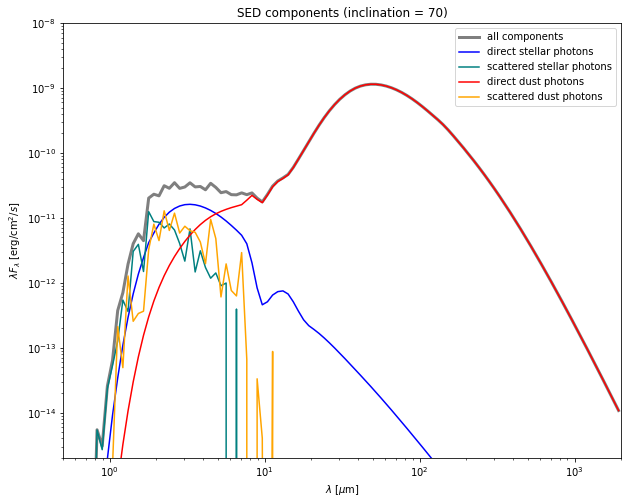

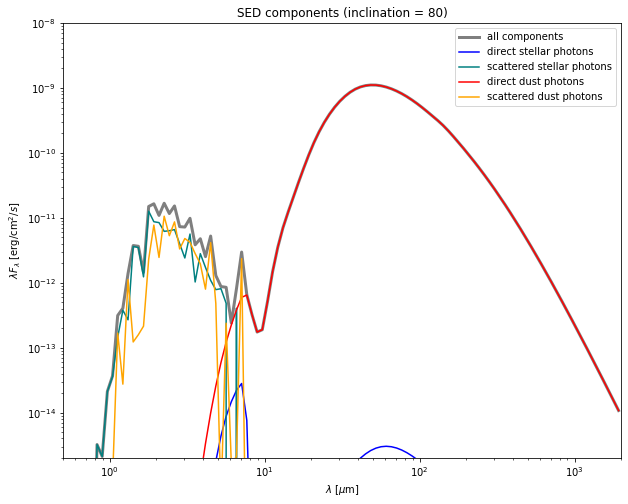

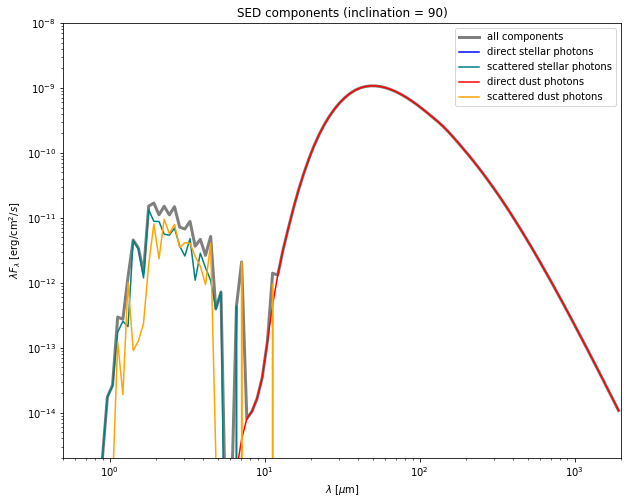

In [7]:
# SEDs for 1e4 photons, 200 x 100 x 5 grid resolution.

fname = 'yso_1e4_200_100_5.rtout'
fname_in = os.path.join(basedir, fname)

plot_all_inclinations(fname_in)

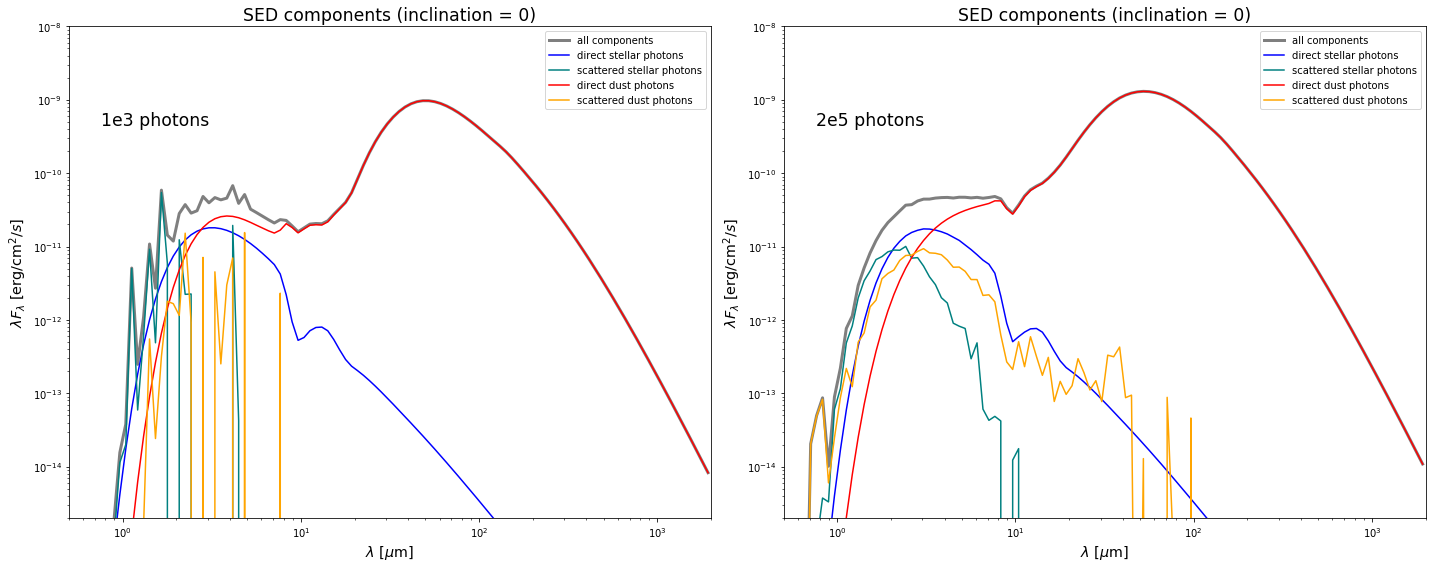

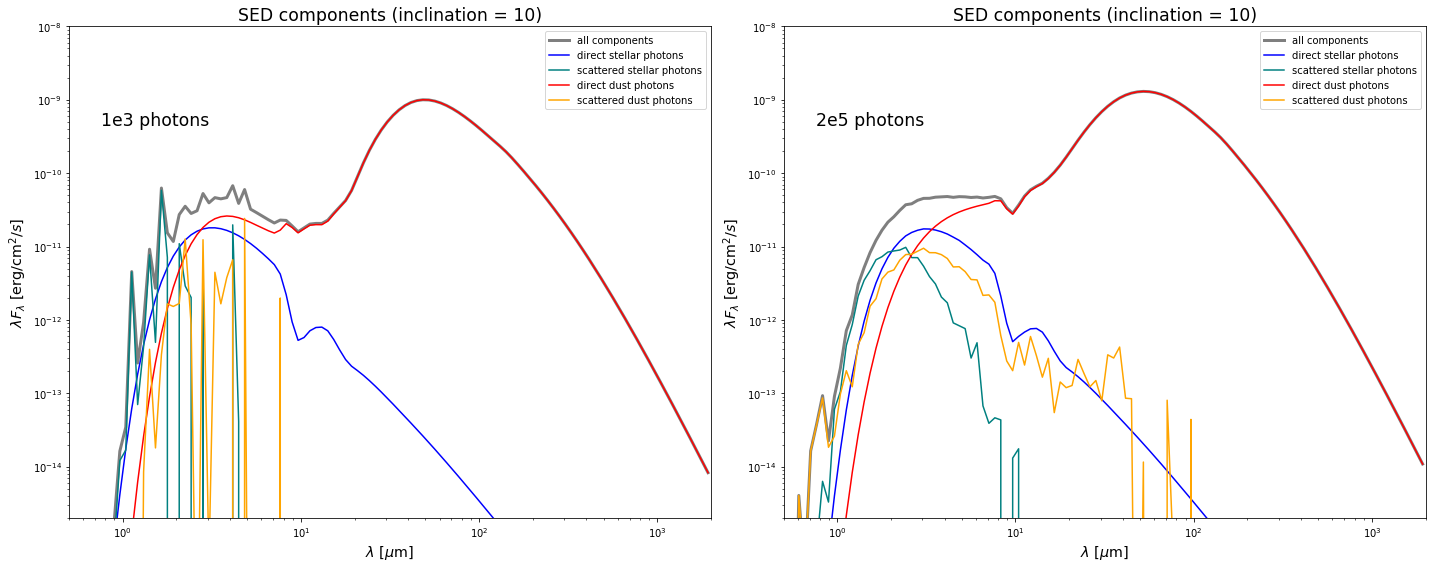

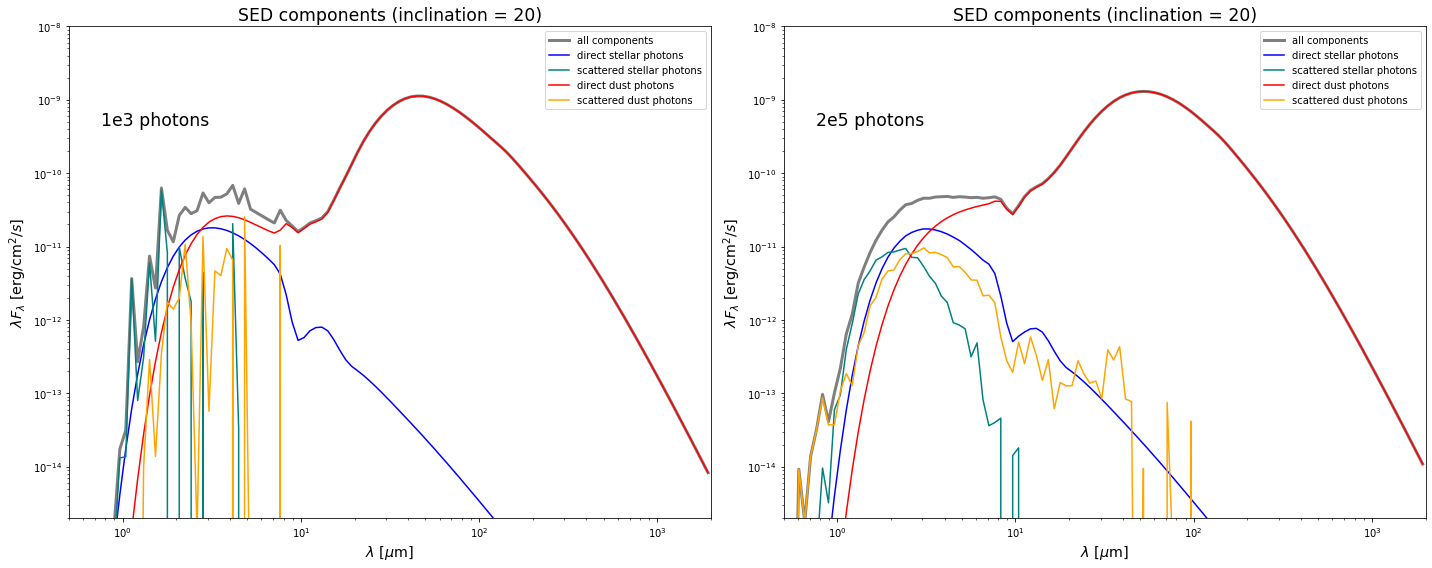

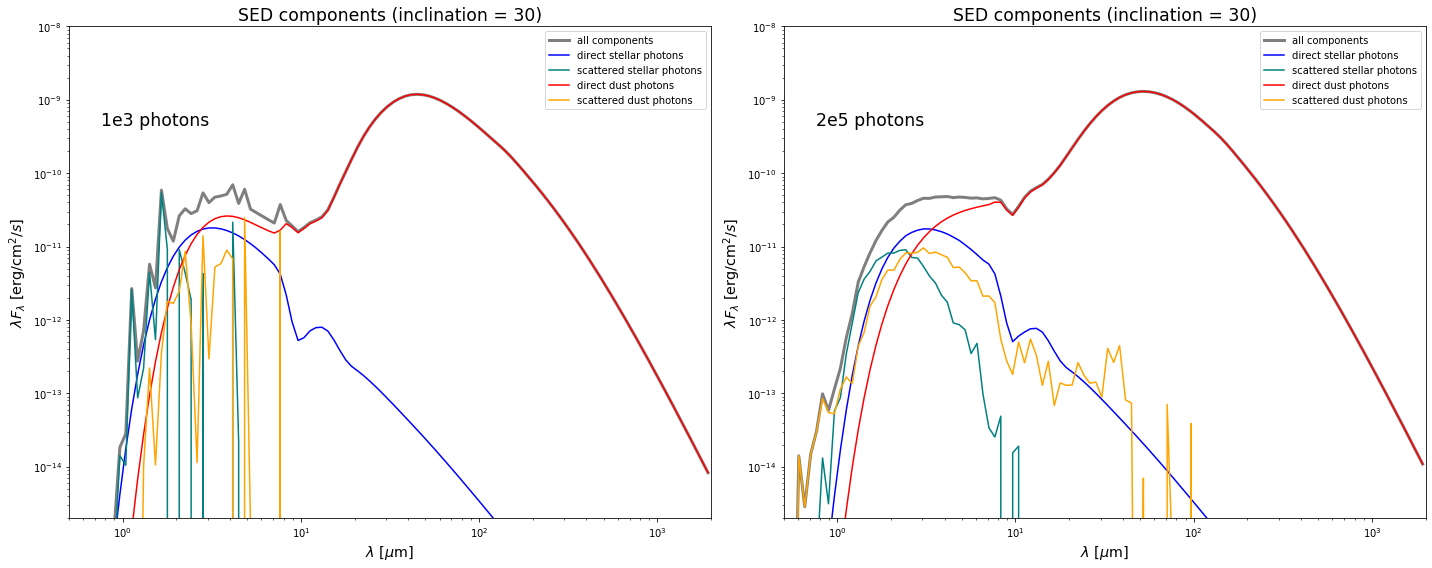

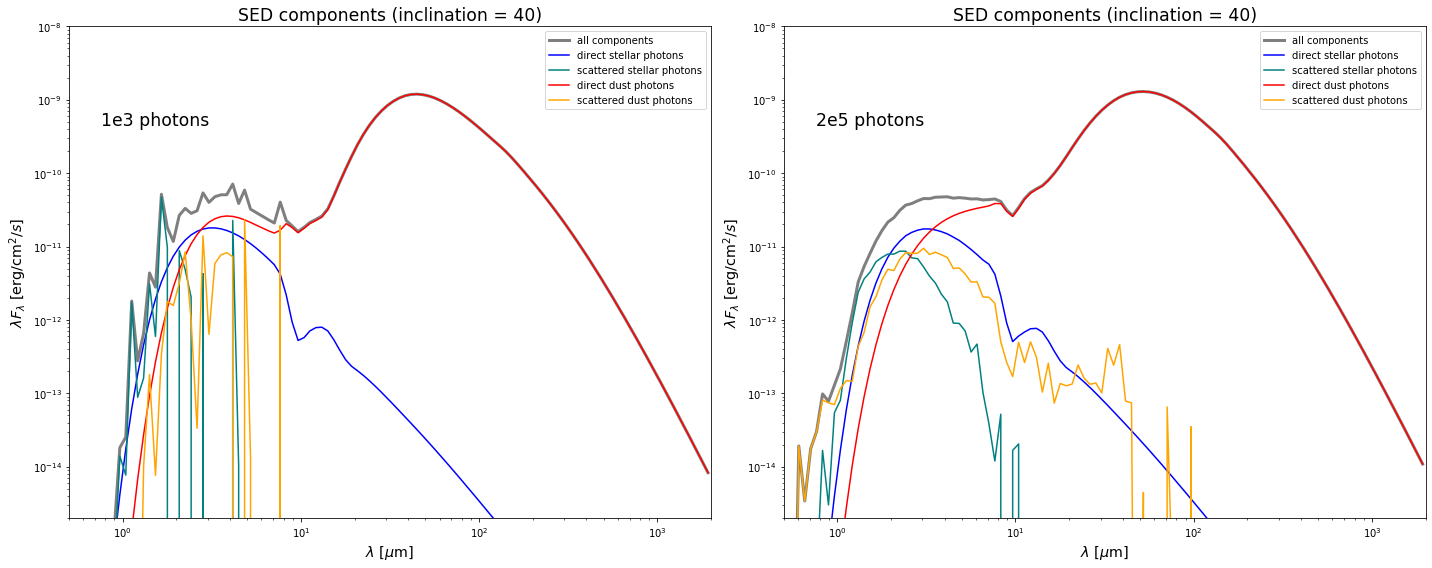

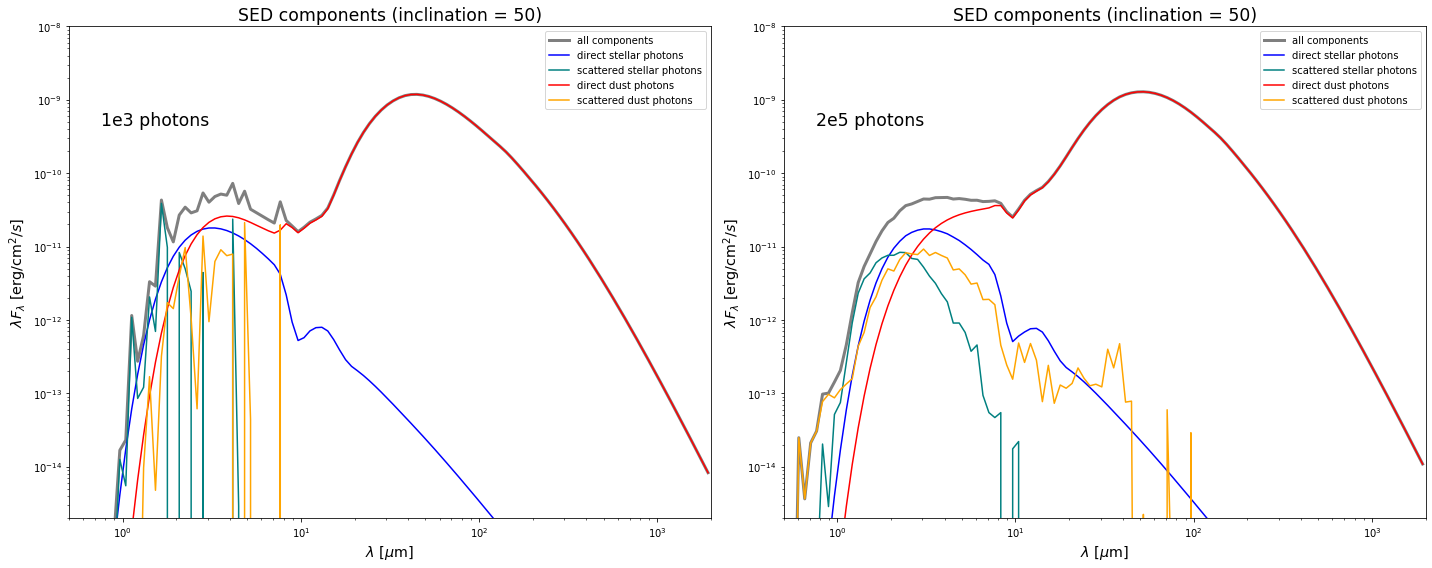

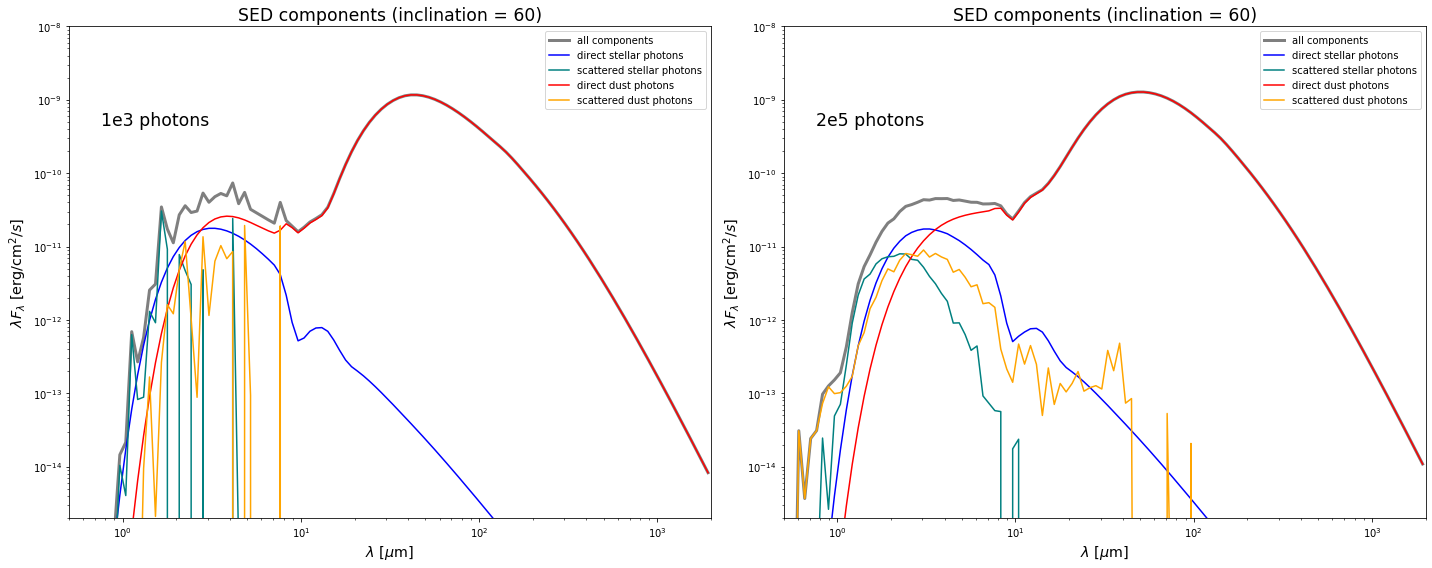

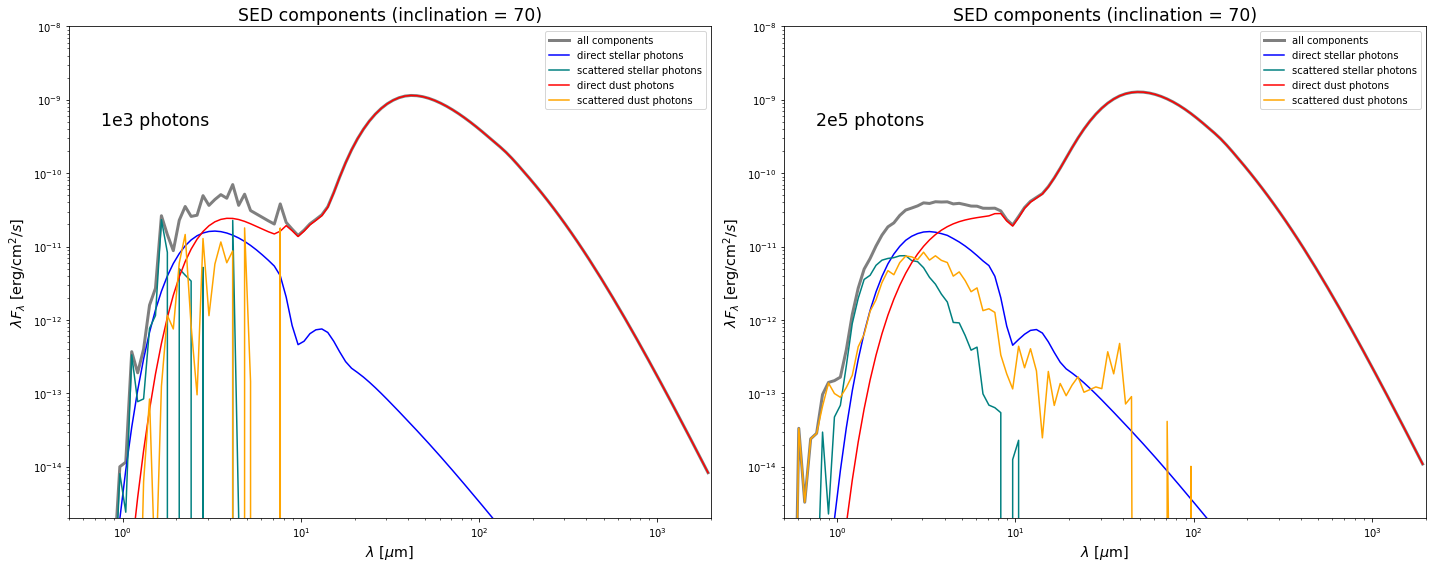

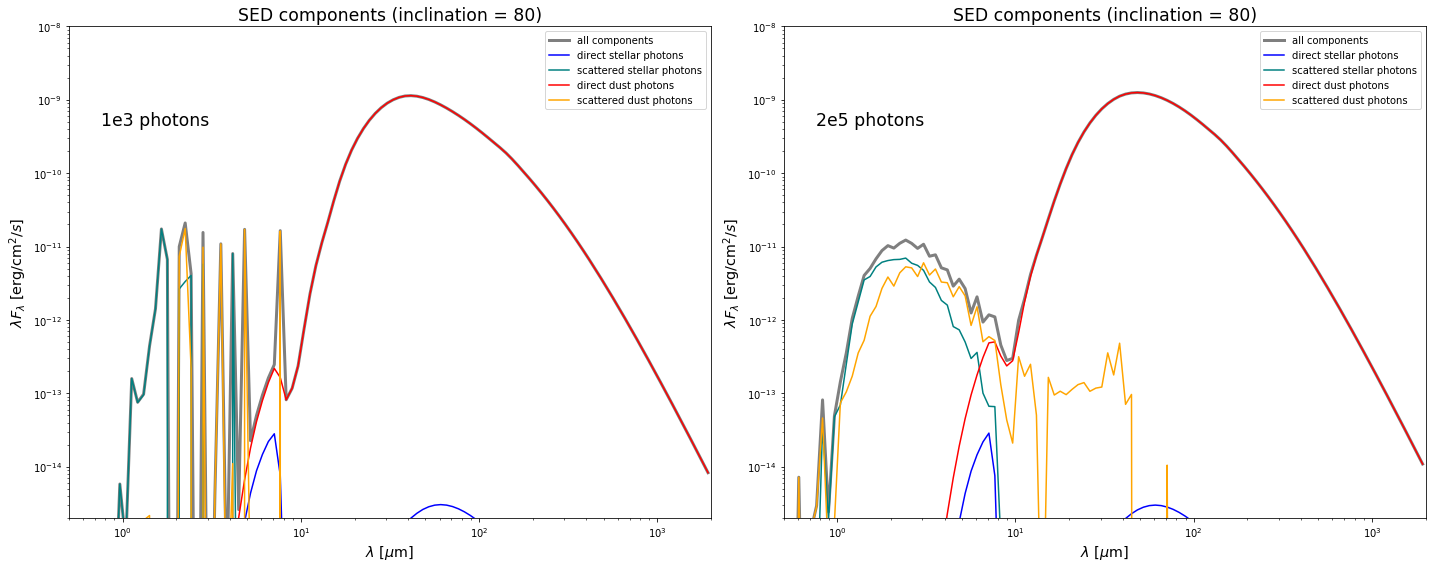

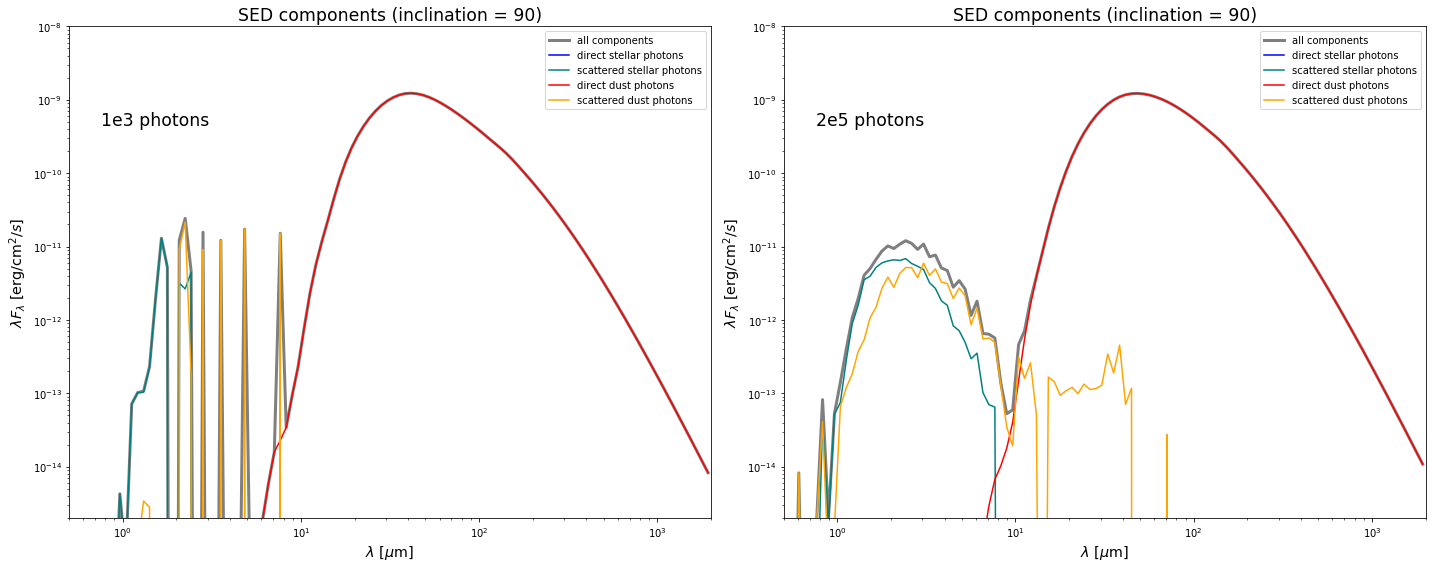

In [8]:
# SED comparison for 200 x 100 x 5 grid, 1e3 vs 2e5 photons.

fname1 = os.path.join(basedir, 'yso_1e3_200_100_5.rtout')
fname2 = os.path.join(basedir, 'yso_2e5_200_100_5_mrw.rtout')

plot_side_by_side(fname1, fname2, '1e3 photons', '2e5 photons')

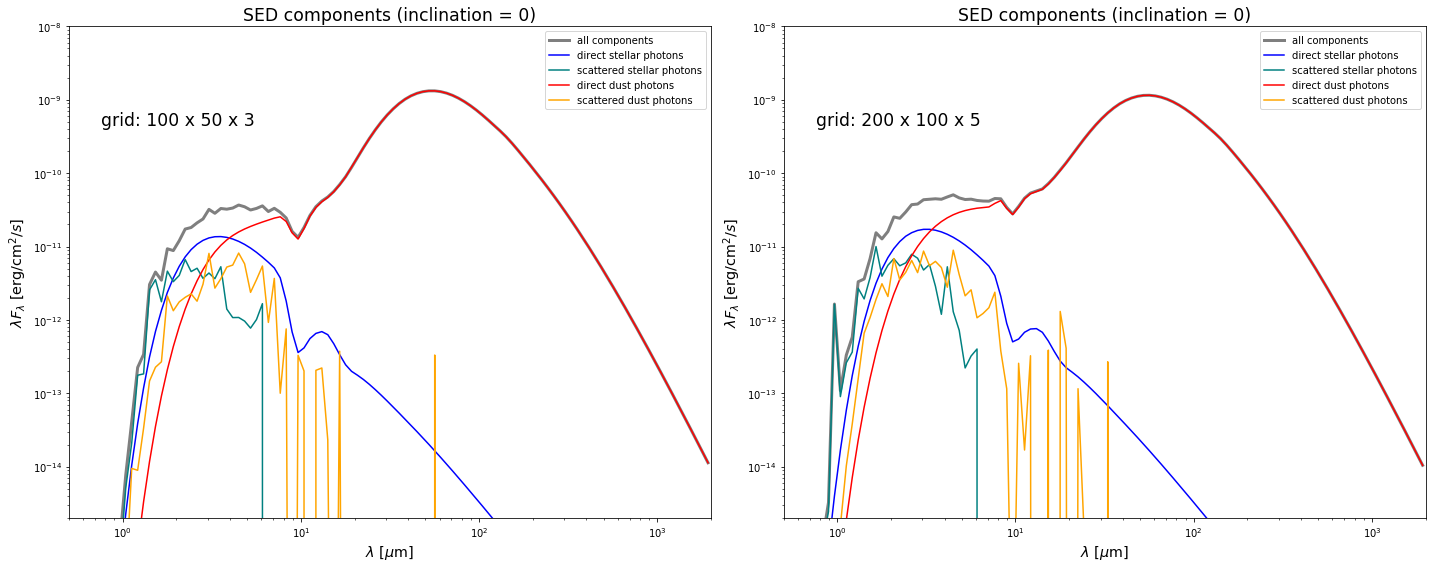

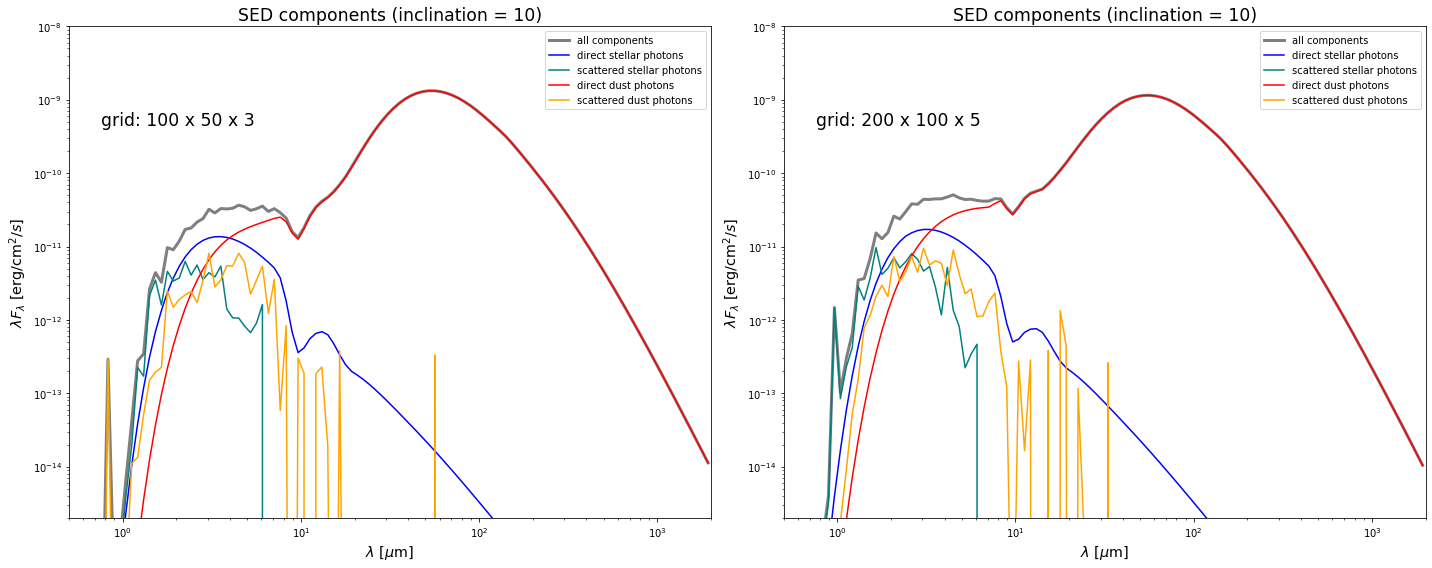

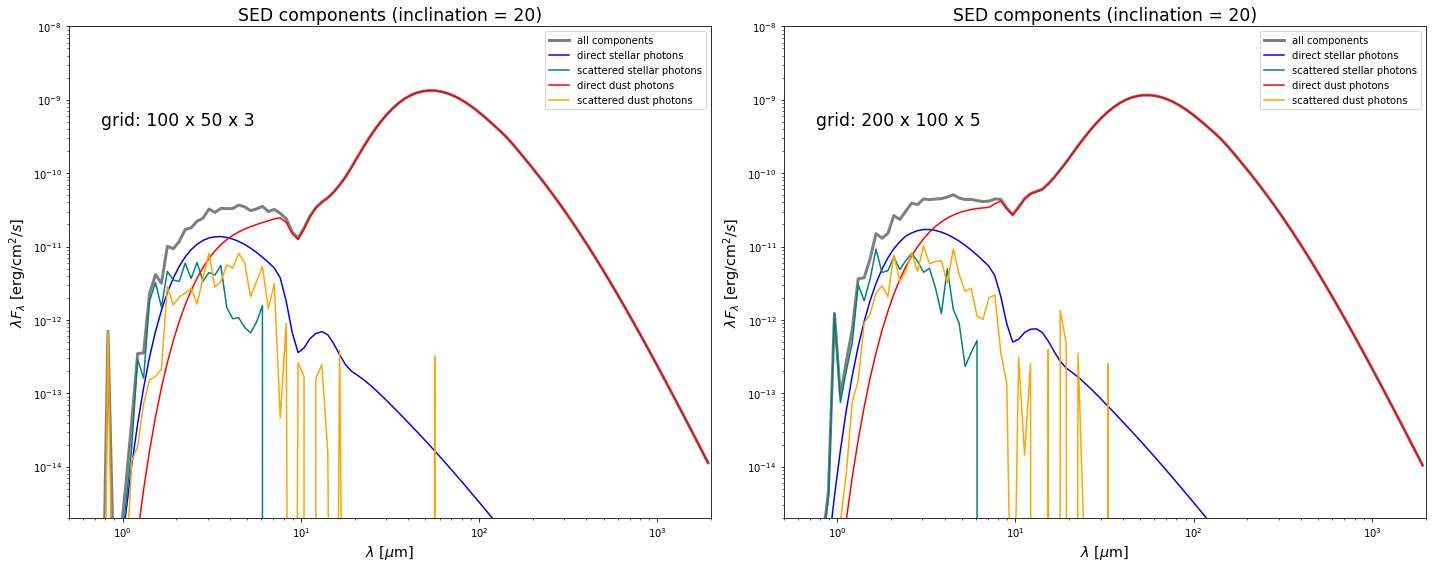

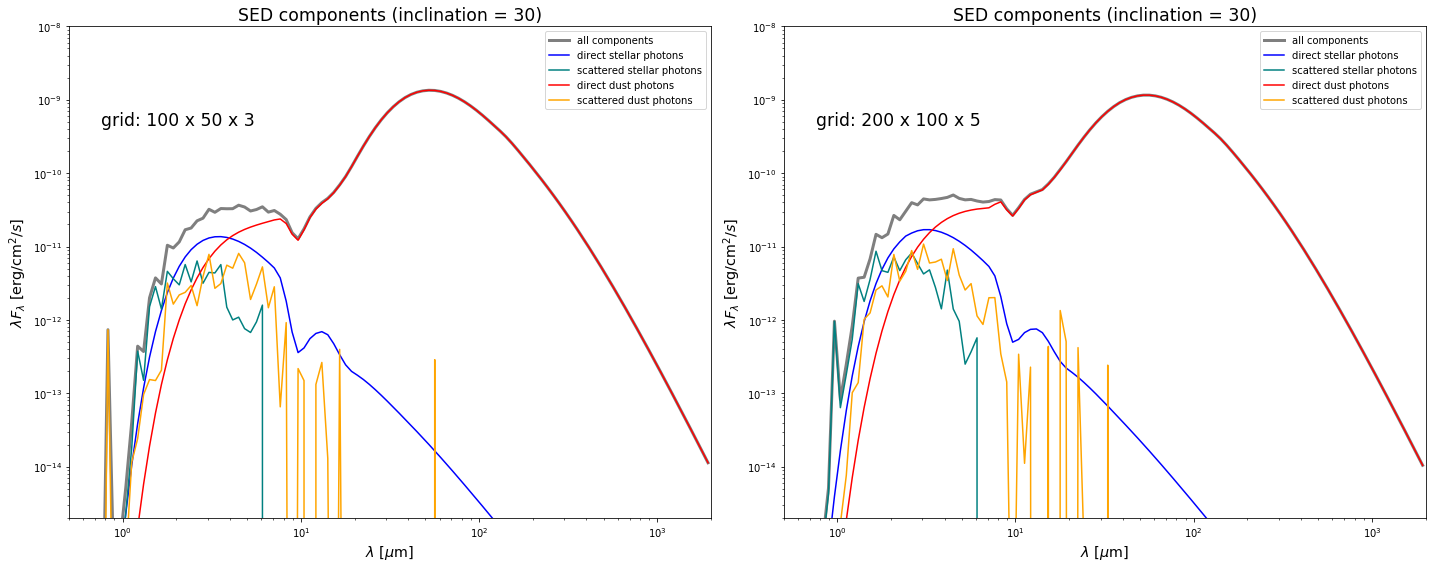

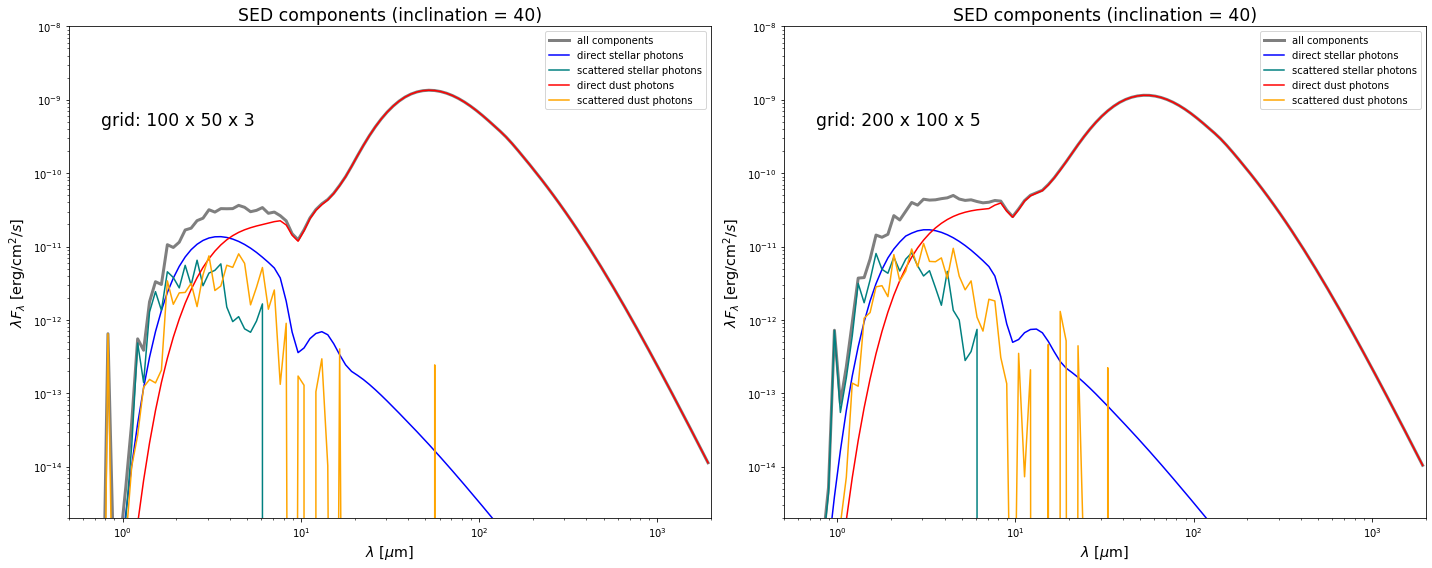

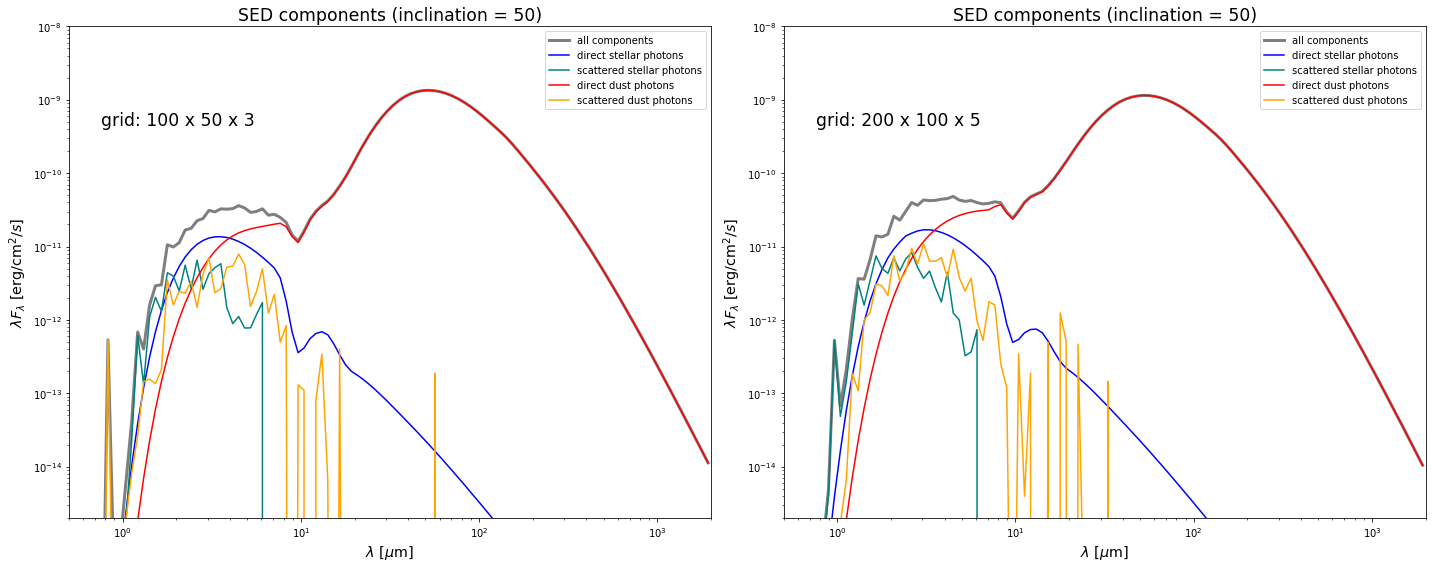

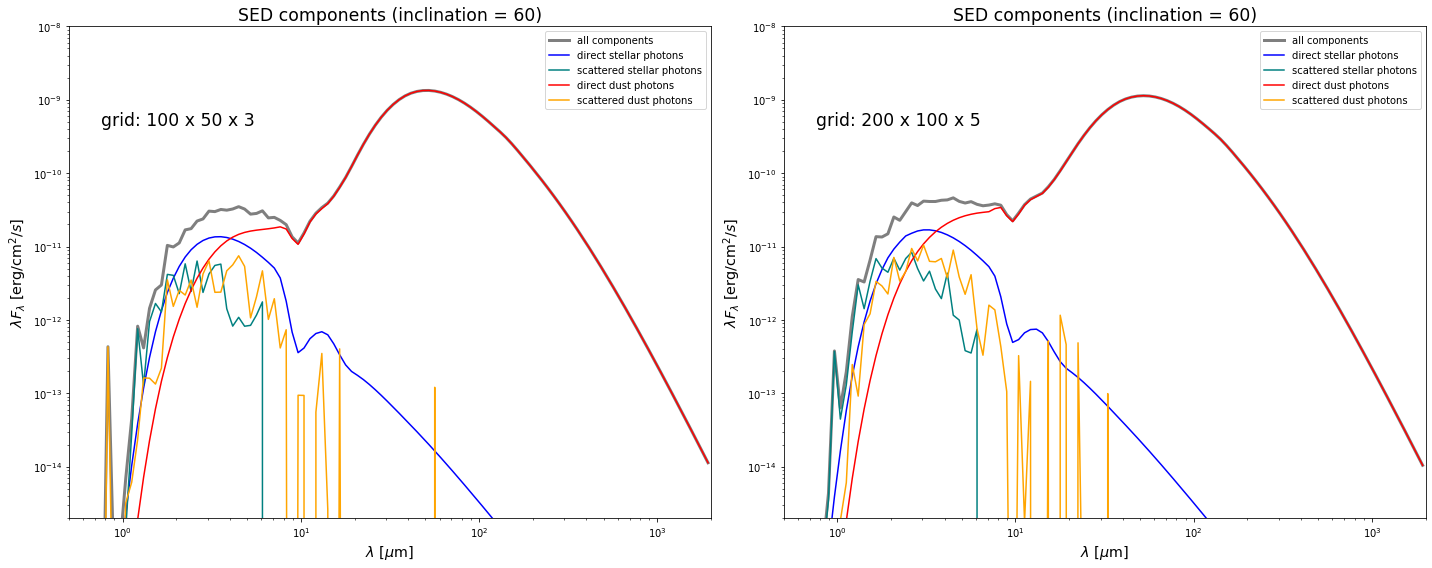

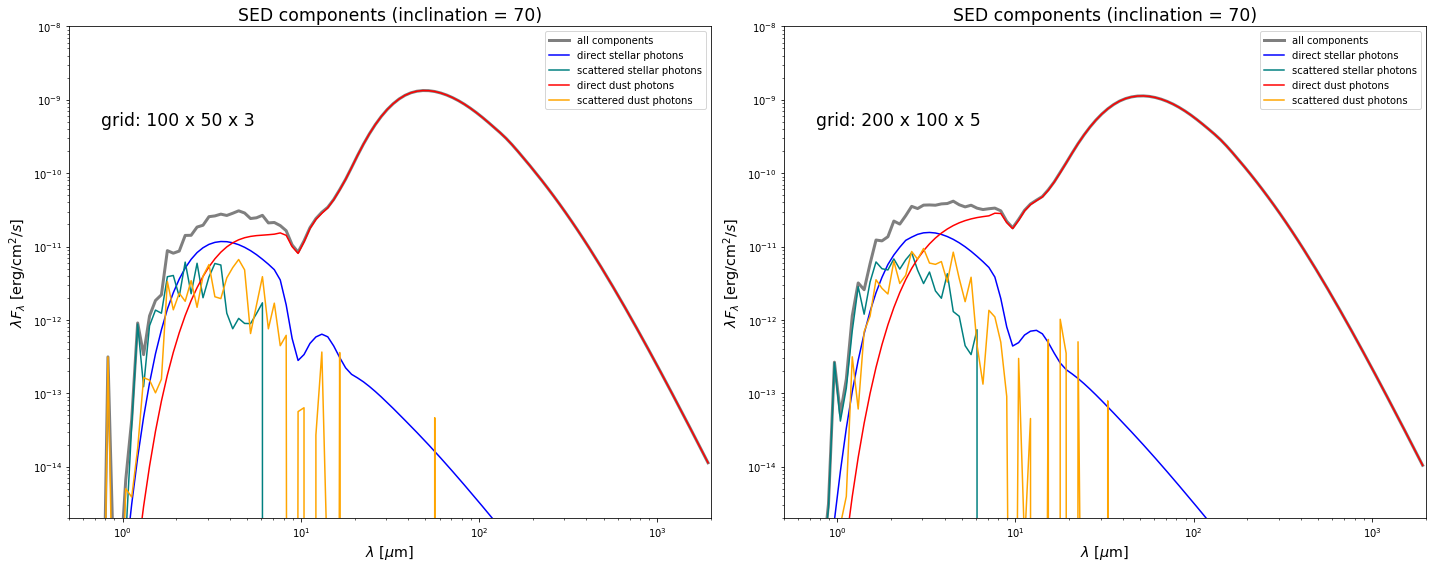

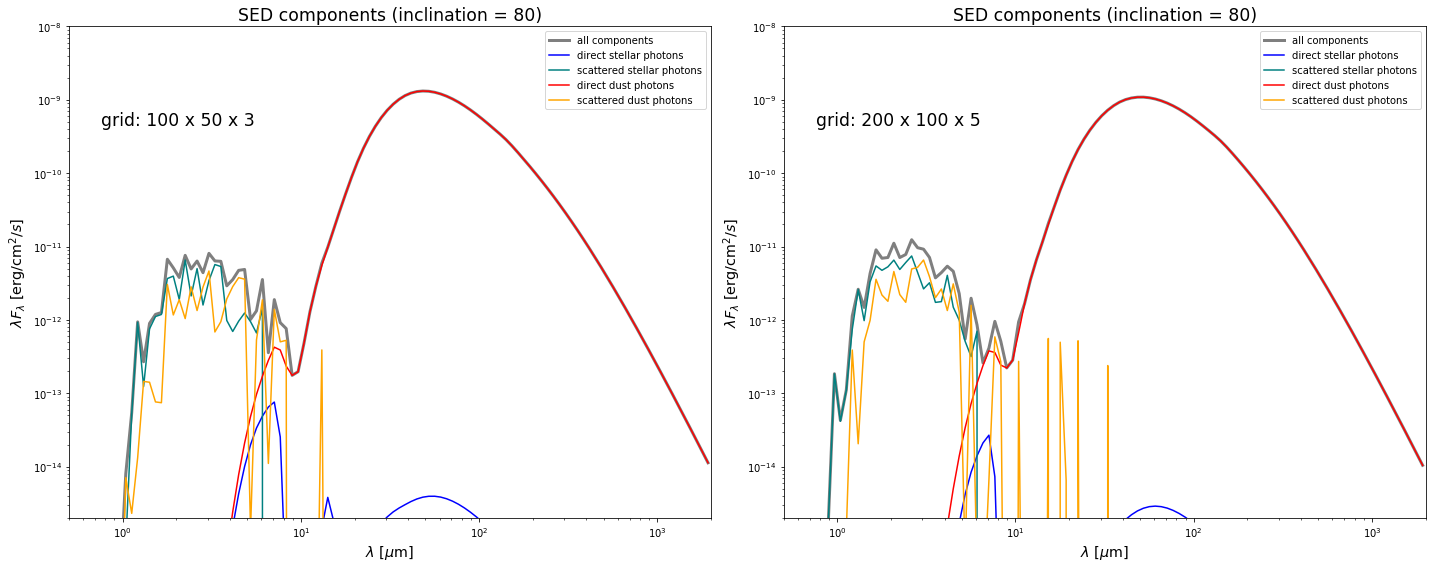

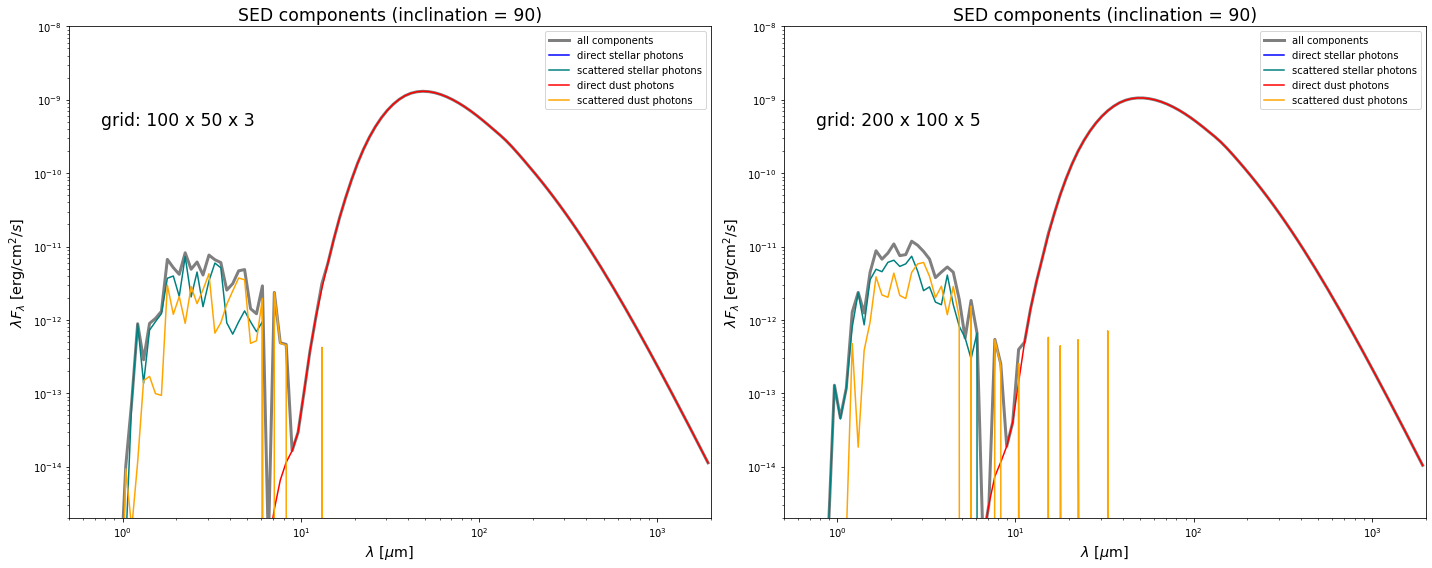

In [9]:
# SED grid resolution comparison, 2e4 photons.

fname1 = os.path.join(basedir, 'yso_2e4_100_50_3_mrw.rtout')
fname2 = os.path.join(basedir, 'yso_2e4_200_100_5.rtout')

plot_side_by_side(fname1, fname2, 'grid: 100 x 50 x 3', 'grid: 200 x 100 x 5')

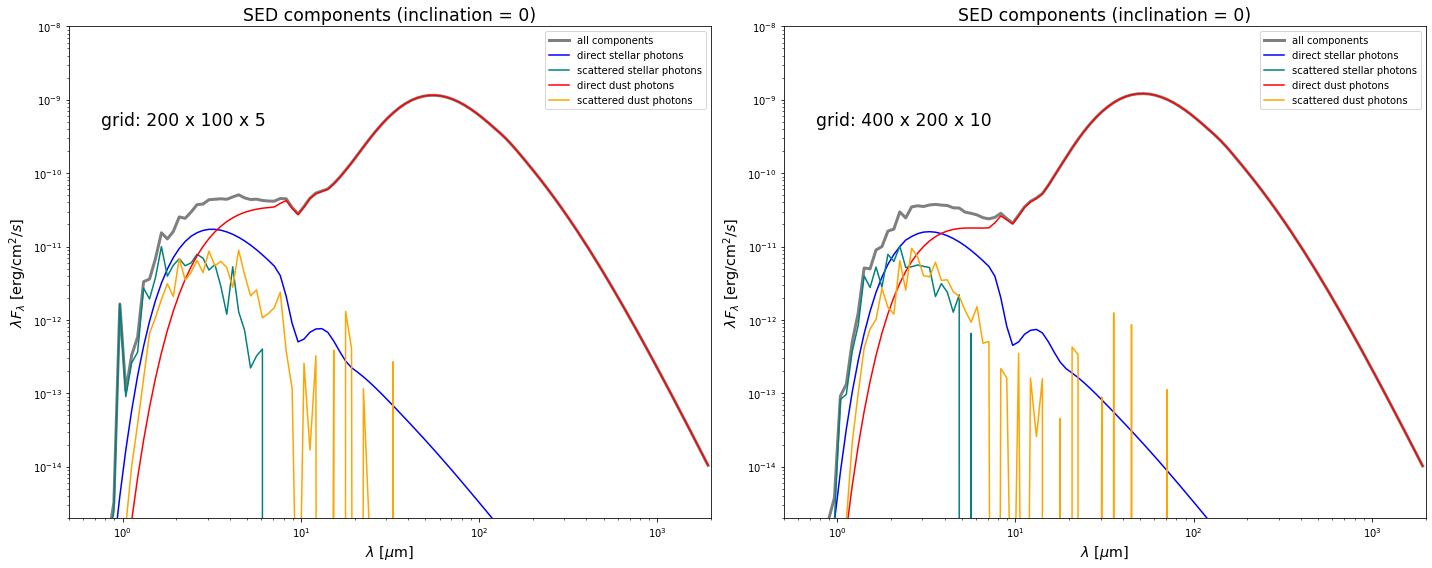

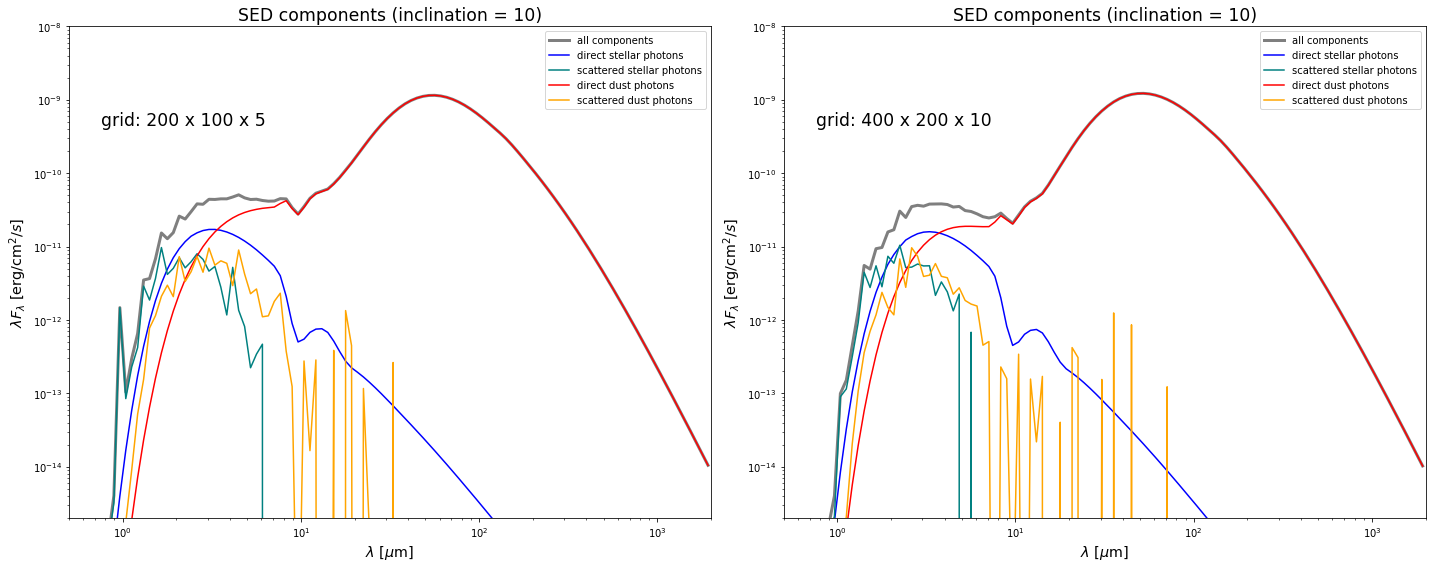

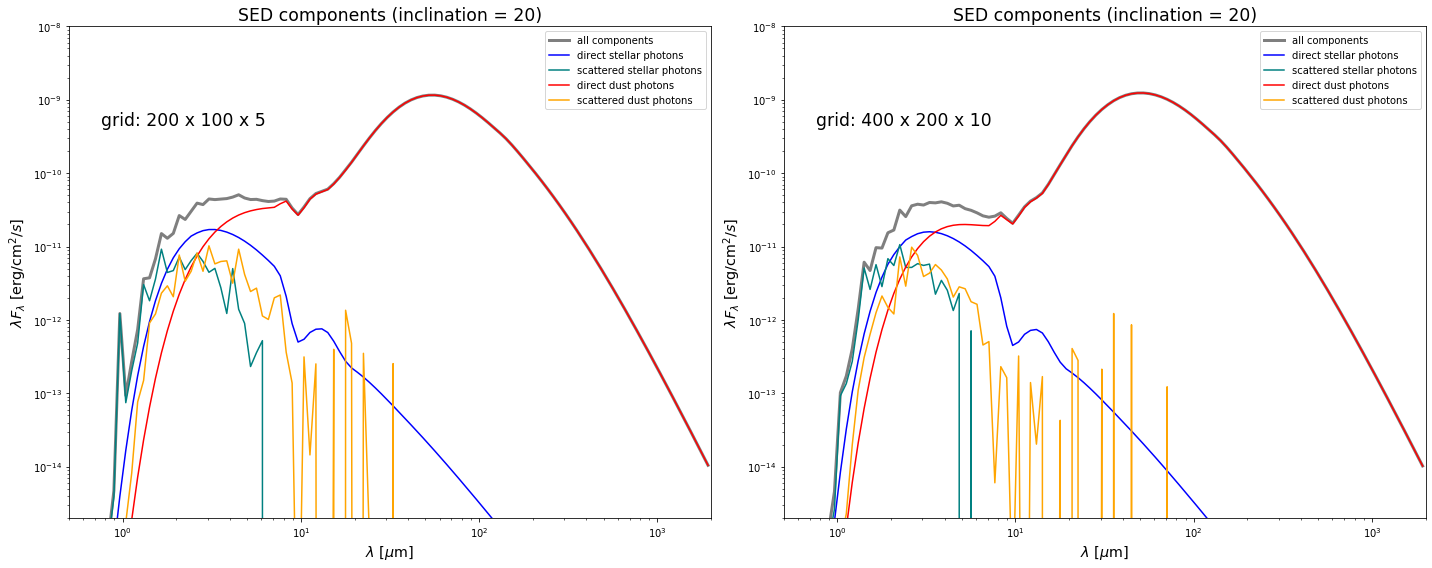

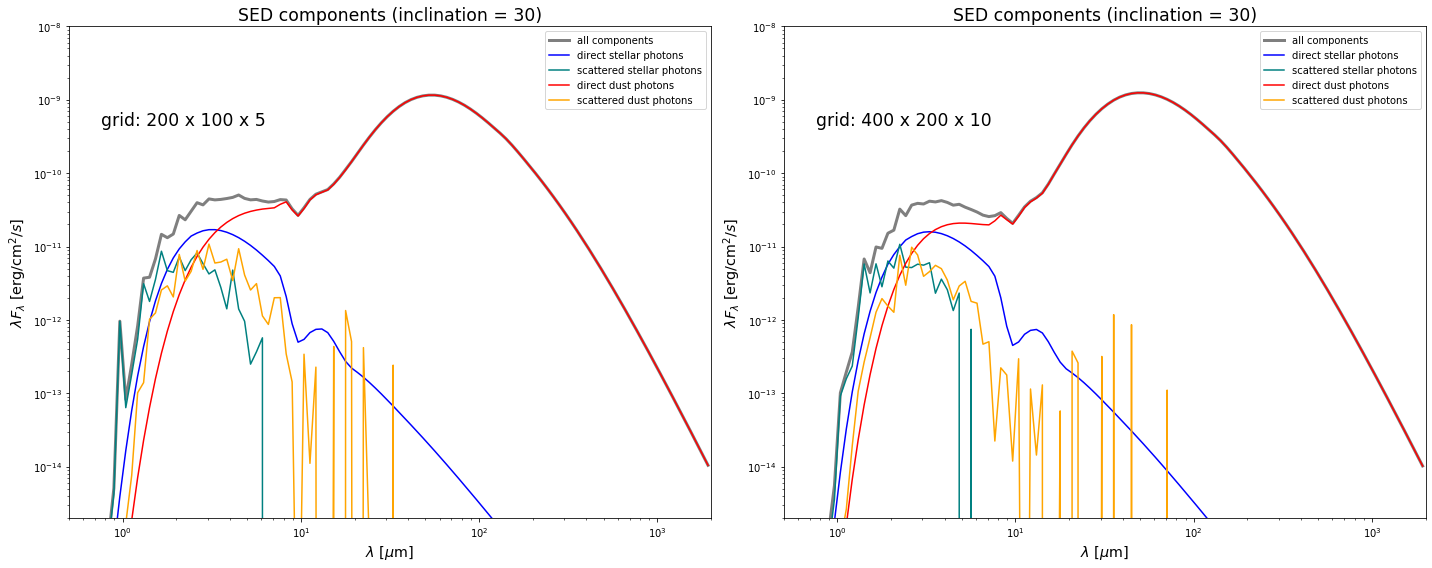

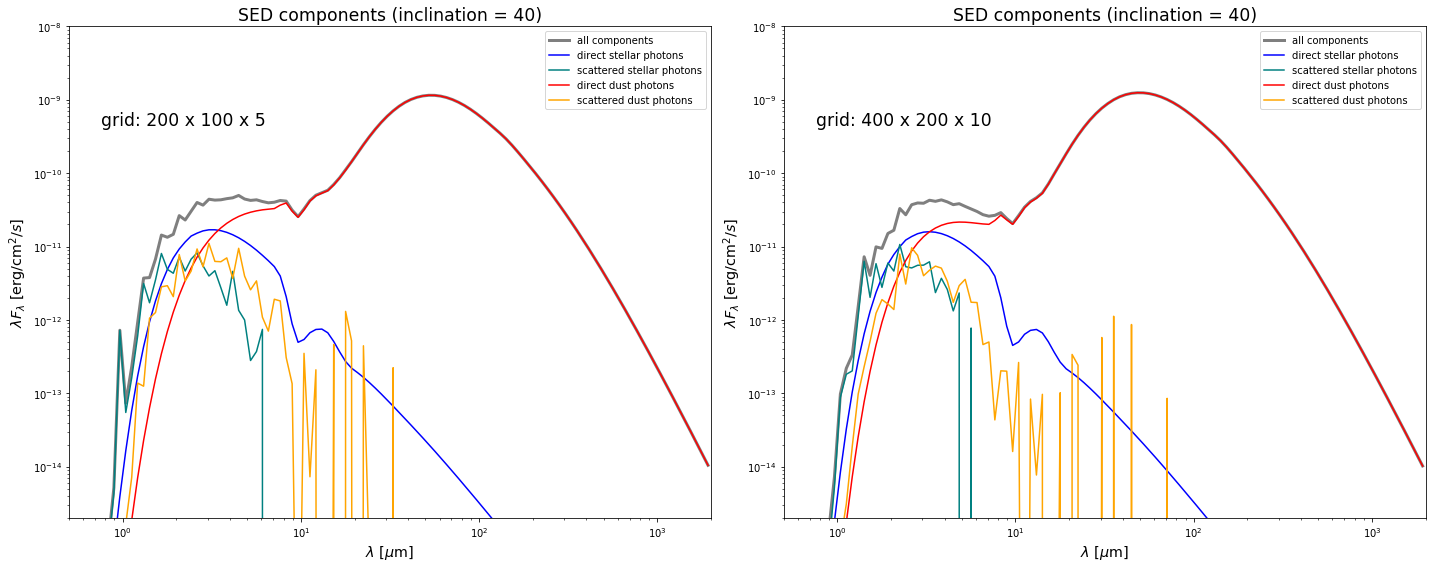

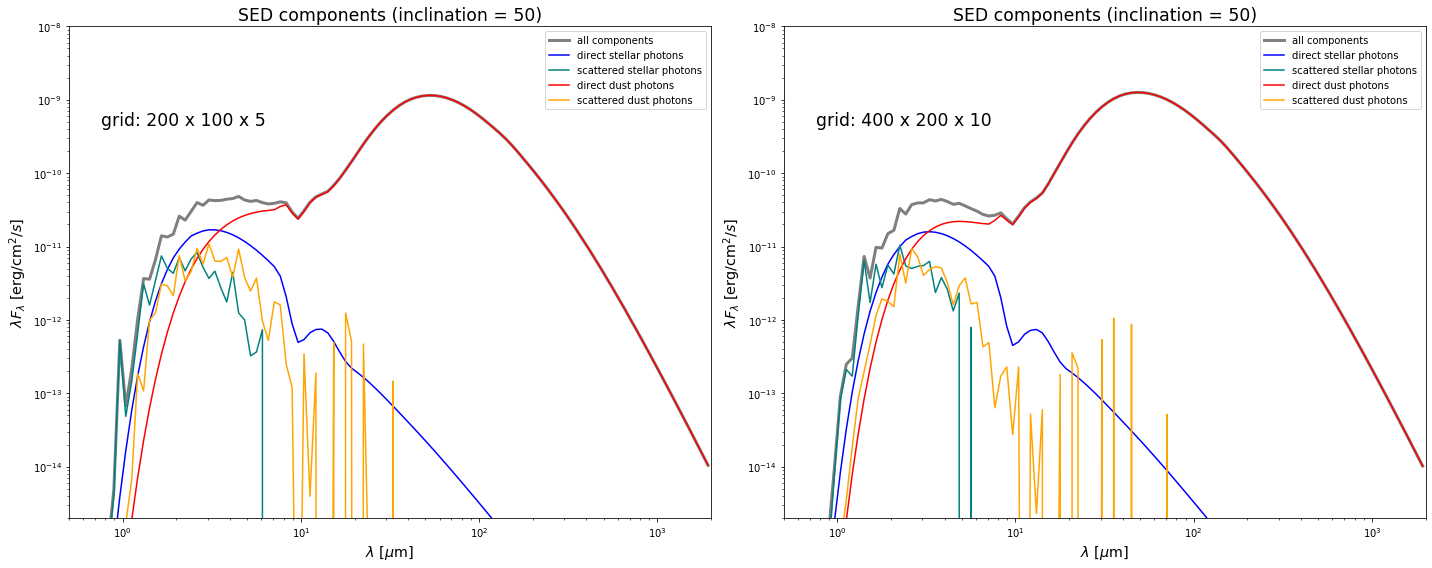

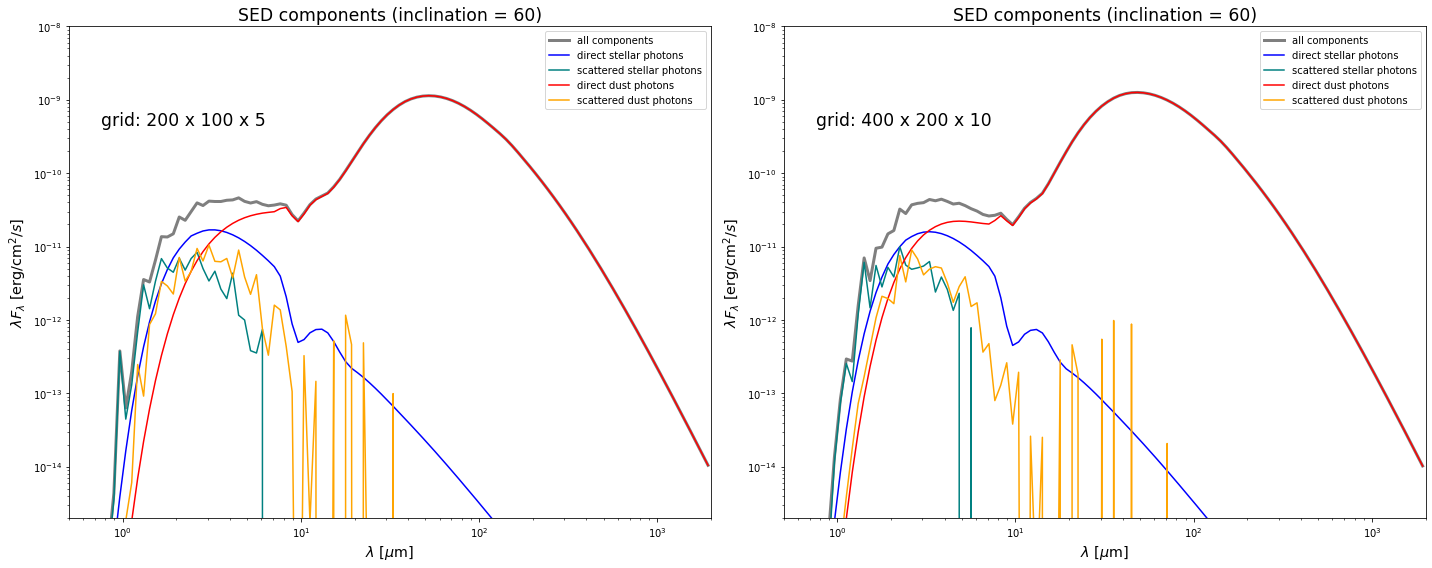

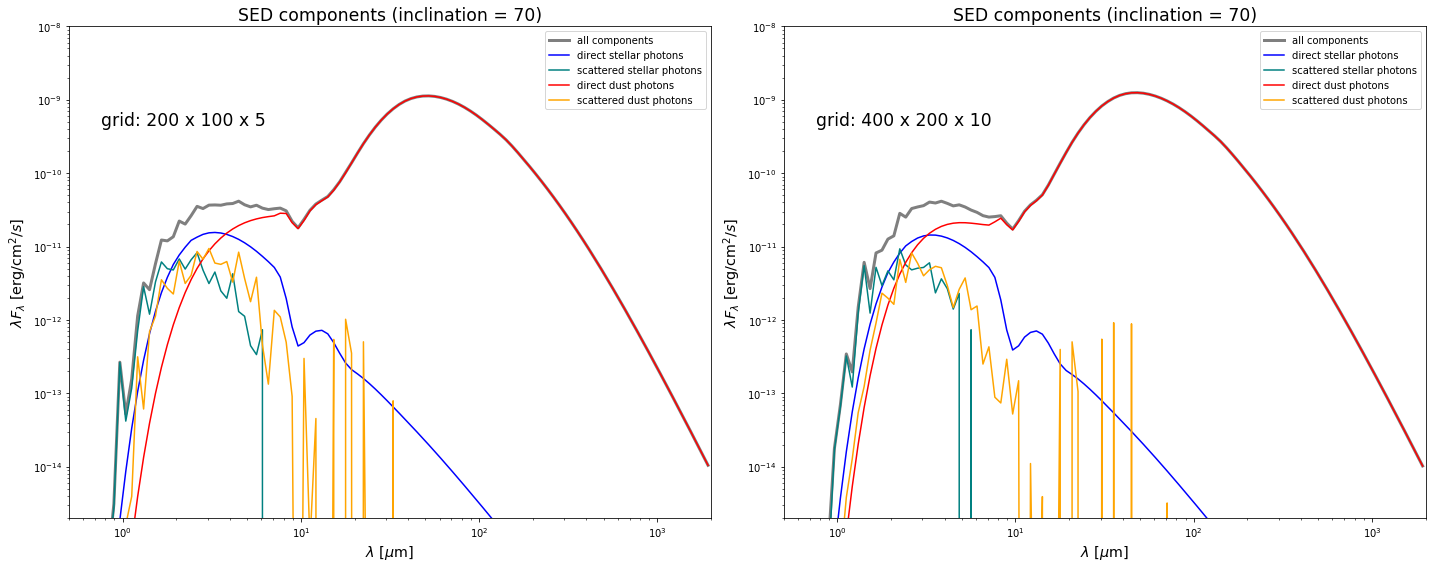

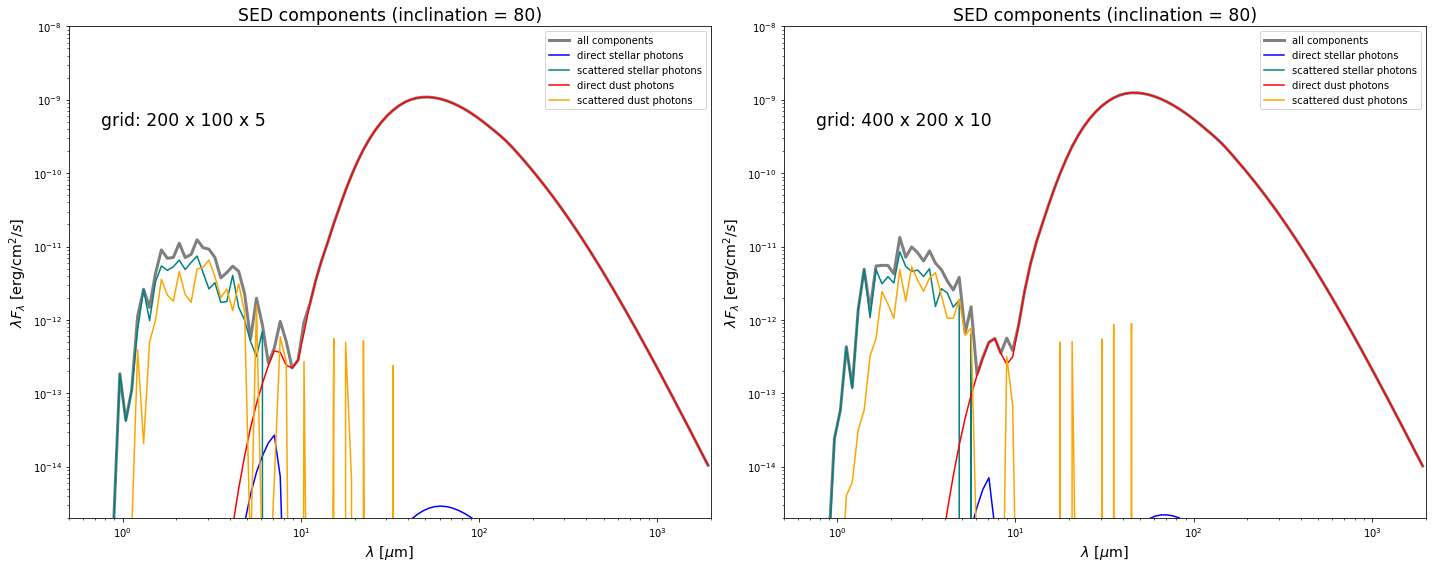

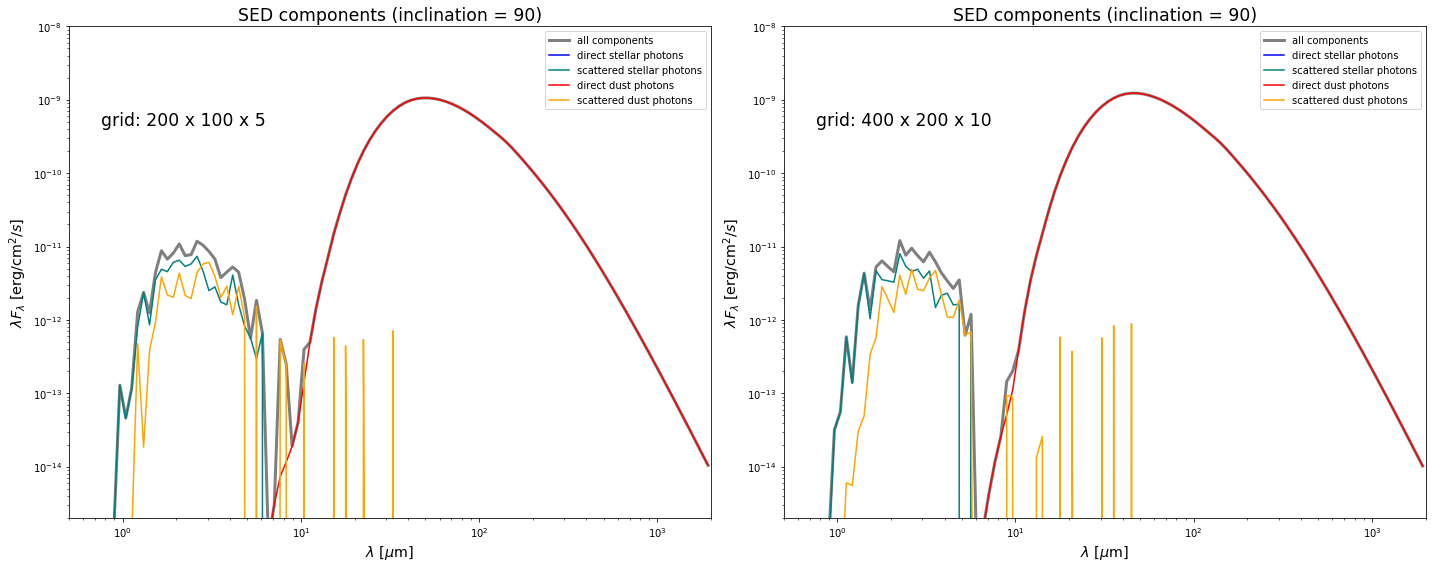

In [10]:
# SED grid resolution comparison, 2e4 photons.

fname1 = os.path.join(basedir, 'yso_2e4_200_100_5.rtout')
fname2 = os.path.join(basedir, 'yso_2e4_400_200_10_mrw.rtout')

plot_side_by_side(fname1, fname2, 'grid: 200 x 100 x 5', 'grid: 400 x 200 x 10')

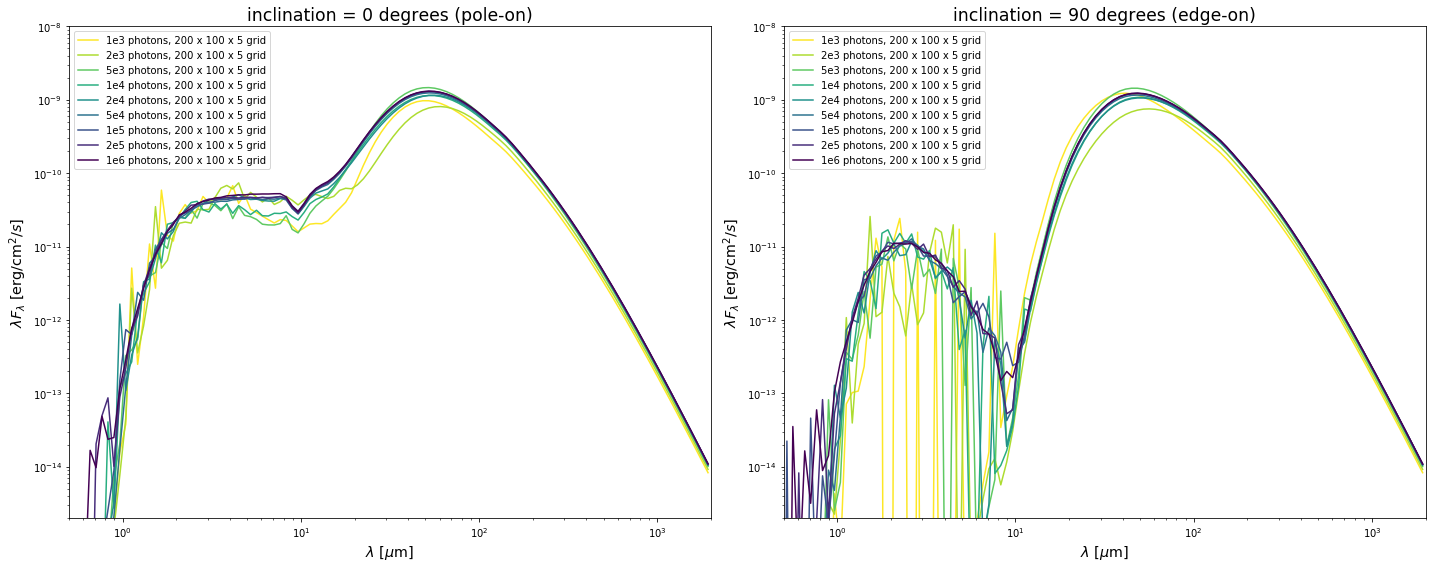

In [11]:
# Fixed 200 x 100 x 5 grid; vary number of photons; check for smoothness. 

models = ['yso_1e3_200_100_5.rtout', 'yso_2e3_200_100_5.rtout', 'yso_5e3_200_100_5.rtout',
          'yso_1e4_200_100_5.rtout', 'yso_2e4_200_100_5.rtout', 'yso_5e4_200_100_5.rtout',
          'yso_1e5_200_100_5_mrw.rtout', 'yso_2e5_200_100_5_mrw.rtout', 'yso_1e6_200_100_5_mrw.rtout']

labels = ['1e3 photons, 200 x 100 x 5 grid', '2e3 photons, 200 x 100 x 5 grid', 
          '5e3 photons, 200 x 100 x 5 grid', '1e4 photons, 200 x 100 x 5 grid', 
          '2e4 photons, 200 x 100 x 5 grid', '5e4 photons, 200 x 100 x 5 grid',
          '1e5 photons, 200 x 100 x 5 grid', '2e5 photons, 200 x 100 x 5 grid', 
          '1e6 photons, 200 x 100 x 5 grid']

cmap = 'viridis'

plot_model_seds(models, labels, cmap)

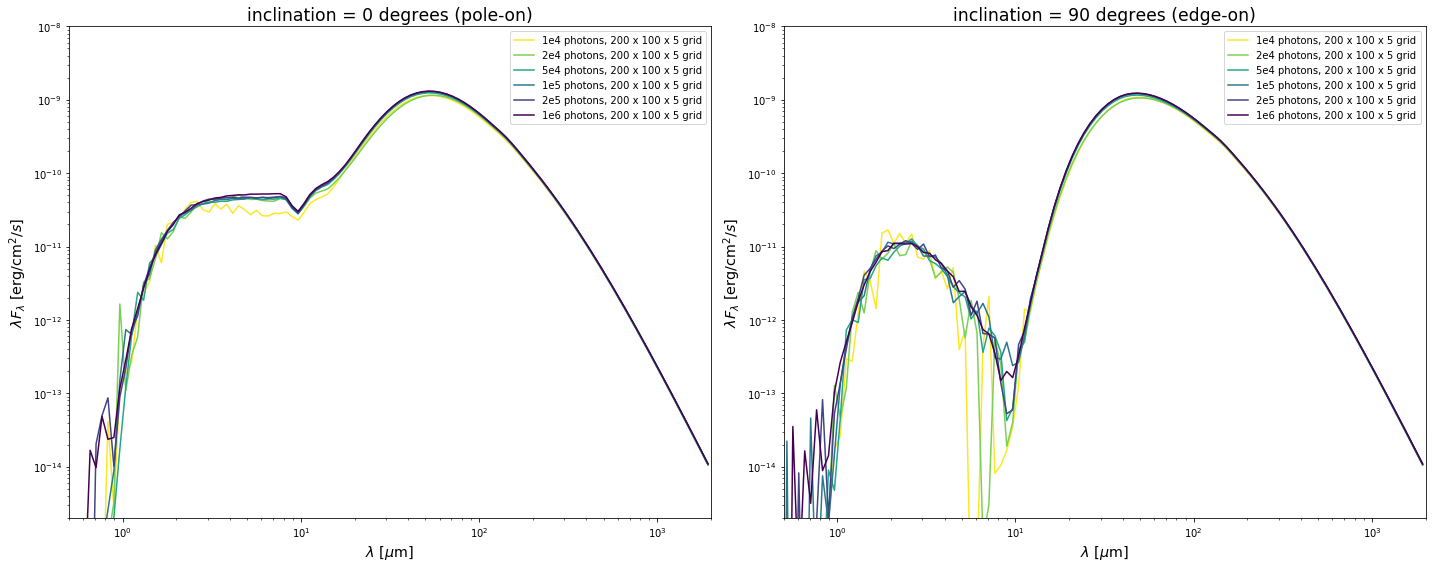

In [12]:
# ~2e5 photons seems to do the trick in terms of capturing scattering well.

models = ['yso_1e4_200_100_5.rtout', 'yso_2e4_200_100_5.rtout', 'yso_5e4_200_100_5.rtout',
          'yso_1e5_200_100_5_mrw.rtout', 'yso_2e5_200_100_5_mrw.rtout', 'yso_1e6_200_100_5_mrw.rtout']

labels = ['1e4 photons, 200 x 100 x 5 grid', 
          '2e4 photons, 200 x 100 x 5 grid', '5e4 photons, 200 x 100 x 5 grid',
          '1e5 photons, 200 x 100 x 5 grid', '2e5 photons, 200 x 100 x 5 grid', 
          '1e6 photons, 200 x 100 x 5 grid']

cmap = 'viridis'

plot_model_seds(models, labels, cmap)

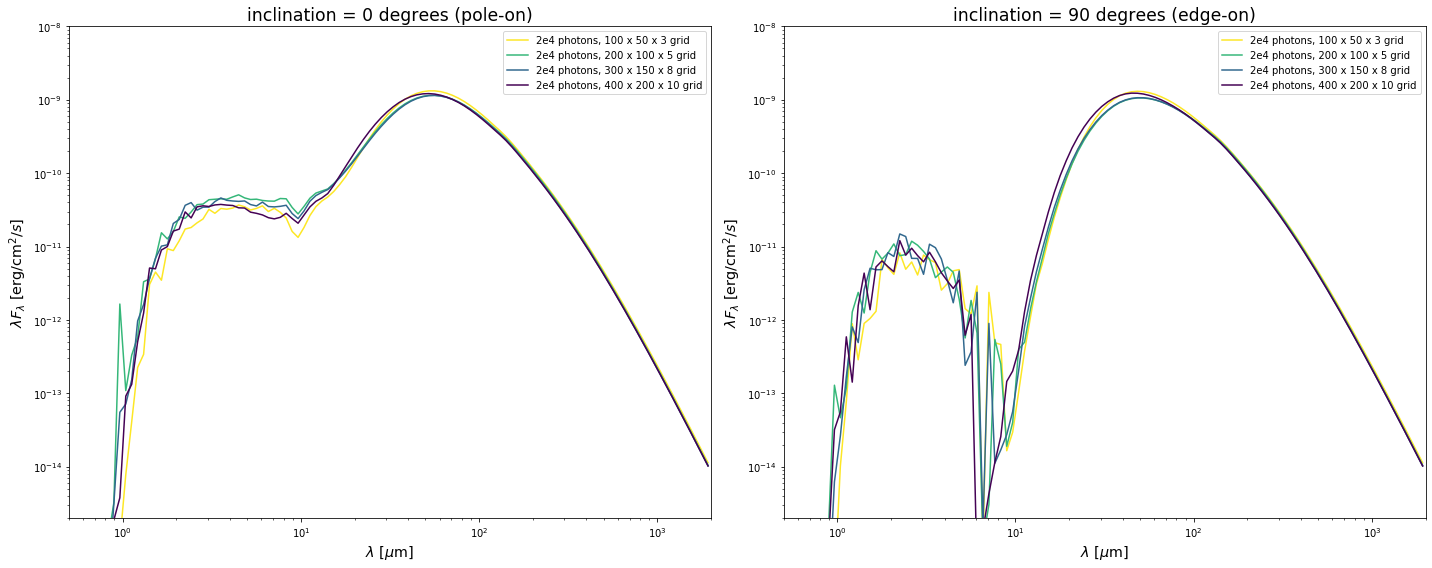

In [13]:
# Varying grid resolution.

models = ['yso_2e4_100_50_3_mrw.rtout', 'yso_2e4_200_100_5.rtout', 'yso_2e4_300_150_8_mrw.rtout',
          'yso_2e4_400_200_10_mrw.rtout']

labels = ['2e4 photons, 100 x 50 x 3 grid', '2e4 photons, 200 x 100 x 5 grid', 
          '2e4 photons, 300 x 150 x 8 grid', '2e4 photons, 400 x 200 x 10 grid']

cmap = 'viridis'

plot_model_seds(models, labels, cmap)

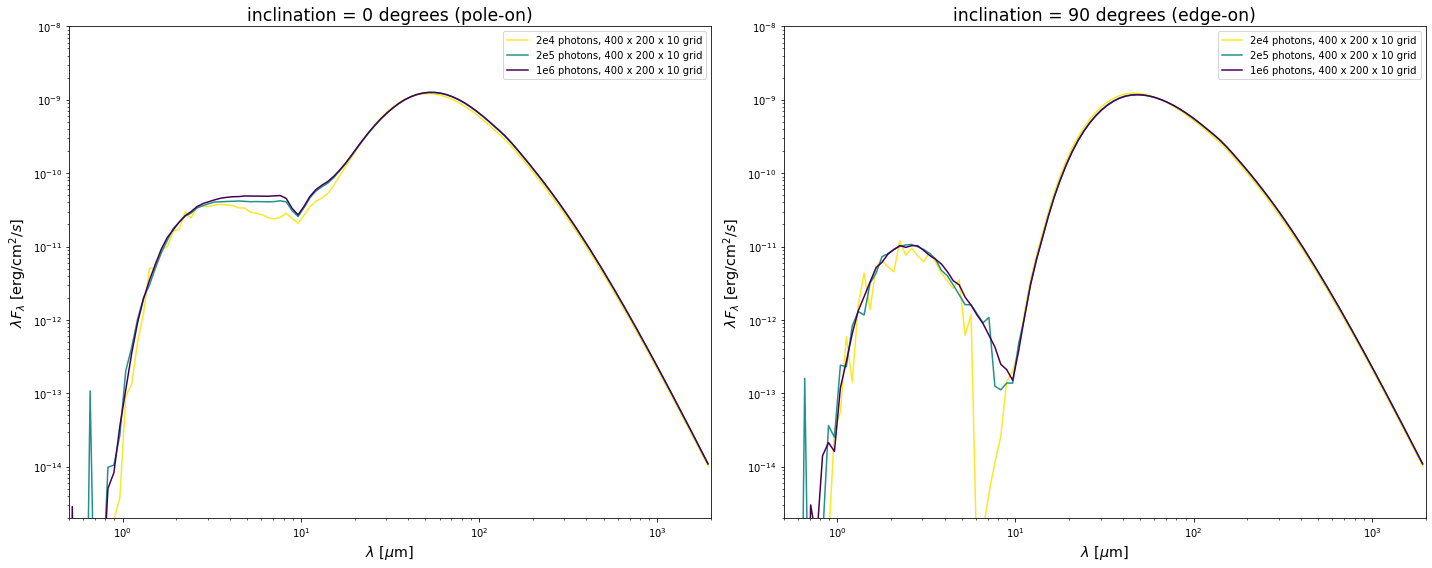

In [14]:
# Increased grid resolution (400 x 200 x 100) and increasing number of photons.

models = ['yso_2e4_400_200_10_mrw.rtout', 'yso_2e5_400_200_10_mrw.rtout',
          'yso_1e6_400_200_10_mrw.rtout']

labels = ['2e4 photons, 400 x 200 x 10 grid', '2e5 photons, 400 x 200 x 10 grid',
          '1e6 photons, 400 x 200 x 10 grid']

cmap = 'viridis'

plot_model_seds(models, labels, cmap)

In [15]:
def plot_temperature(fname_in, txt):

    m = ModelOutput(fname_in)

    # Extract the quantities
    g = m.get_quantities()

    # Get the wall positions for r and theta
    rw, tw = g.r_wall / au, g.t_wall

    # Make a 2-d grid of the wall positions (used by pcolormesh)
    R, T = np.meshgrid(rw, tw)

    # Make a plot in (r, theta) space
    fig = plt.figure(figsize=(10, 8))
    ax  = fig.add_subplot(1, 1, 1)
    
    c = ax.pcolormesh(R, T, g['temperature'][0].array[0, :, :], cmap='inferno')

    ax.set_xscale('log')
    ax.set_xlim(rw[1], rw[-1])
    ax.set_ylim(tw[0], tw[-1])
    ax.set_xlabel('r (au)', fontsize='x-large')
    ax.set_ylabel(r'$\theta$', fontsize='x-large')
    ax.set_title(txt, fontsize='x-large')
    ax.set_yticks([np.pi, np.pi * 0.75, np.pi * 0.5, np.pi * 0.25, 0.])
    ax.set_yticklabels([r'$\pi$', r'$3\pi/4$', r'$\pi/2$', r'$\pi/4$', r'$0$'])
    cb = fig.colorbar(c)
    cb.set_label('Temperature (K)')

    plt.show()

In [16]:
def plot_temperature_side_by_side(fname1, fname2, txt1, txt2):
    
    # Set up figure.
    fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(20.0, 8.0))
    
    m1 = ModelOutput(fname1); m2 = ModelOutput(fname2)

    # Extract the quantities
    g1 = m1.get_quantities(); g2 = m2.get_quantities()

    # Get the wall positions for r and theta
    rw1, tw1 = g1.r_wall / au, g1.t_wall; rw2, tw2 = g2.r_wall / au, g2.t_wall

    # Make a 2-d grid of the wall positions (used by pcolormesh)
    R1, T1 = np.meshgrid(rw1, tw1); R2, T2 = np.meshgrid(rw2, tw2)

    # Make plots in (r, theta) space
    c1 = axs[0].pcolormesh(R1, T1, g1['temperature'][0].array[0, :, :], cmap='inferno')
    c2 = axs[1].pcolormesh(R2, T2, g2['temperature'][0].array[0, :, :], cmap='inferno')

    for ax in axs: 
        ax.set_xscale('log')
        ax.set_xlabel('r (au)', fontsize='x-large')
        ax.set_ylabel(r'$\theta$', fontsize='x-large')
        ax.set_yticks([np.pi, np.pi * 0.75, np.pi * 0.5, np.pi * 0.25, 0.])
        ax.set_yticklabels([r'$\pi$', r'$3\pi/4$', r'$\pi/2$', r'$\pi/4$', r'$0$'])
        
    cb1 = fig.colorbar(c1, ax=axs[0]); cb2 = fig.colorbar(c2, ax=axs[1])
    cb1.set_label('Temperature (K)'); cb2.set_label('Temperature (K)')

    axs[0].set_xlim(rw1[1], rw1[-1]); axs[0].set_ylim(tw1[0], tw1[-1])
    axs[1].set_xlim(rw2[1], rw2[-1]); axs[1].set_ylim(tw2[0], tw2[-1])
    
    axs[0].set_title(txt1, fontsize='x-large'); axs[1].set_title(txt2, fontsize='x-large')

    plt.show()

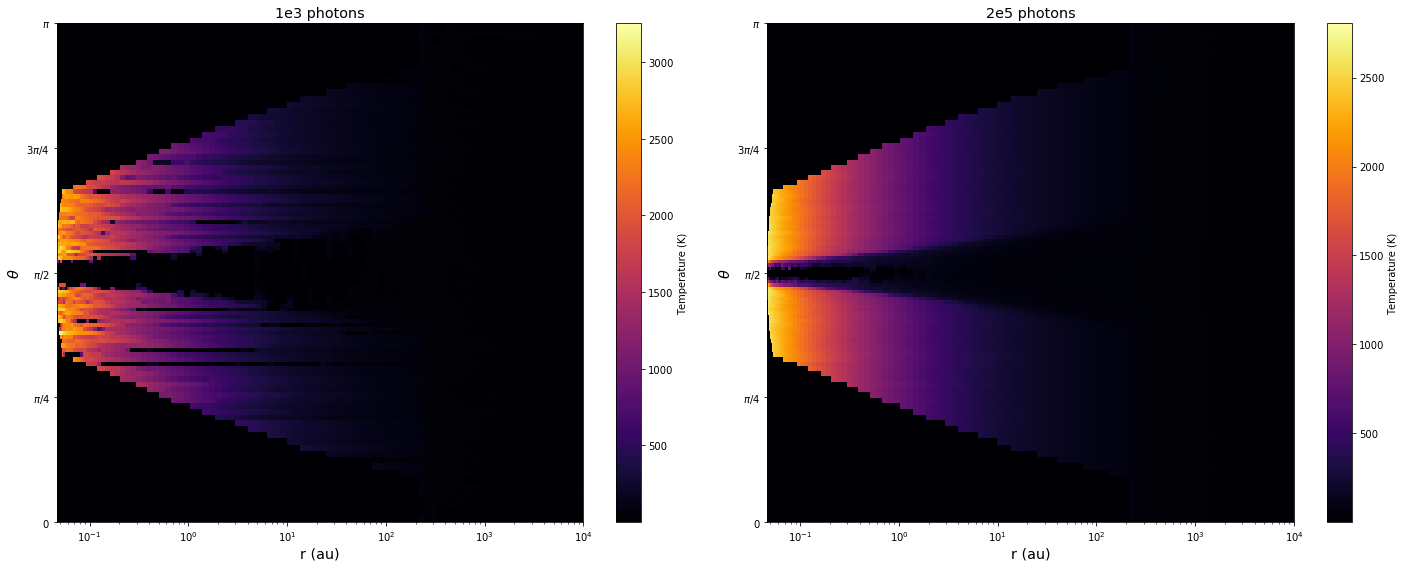

In [17]:
fname1 = os.path.join(basedir, 'yso_1e3_200_100_5.rtout')
fname2 = os.path.join(basedir, 'yso_2e5_200_100_5_mrw.rtout')

plot_temperature_side_by_side(fname1, fname2, '1e3 photons', '2e5 photons')

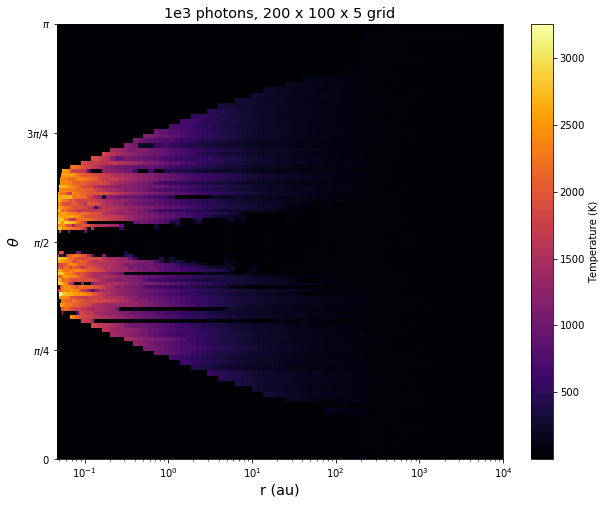

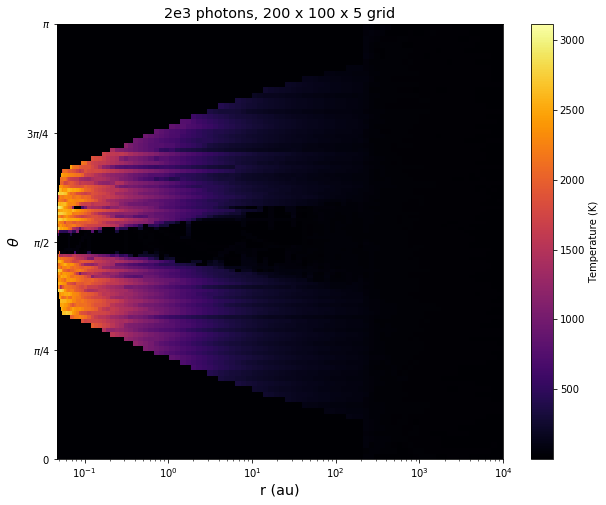

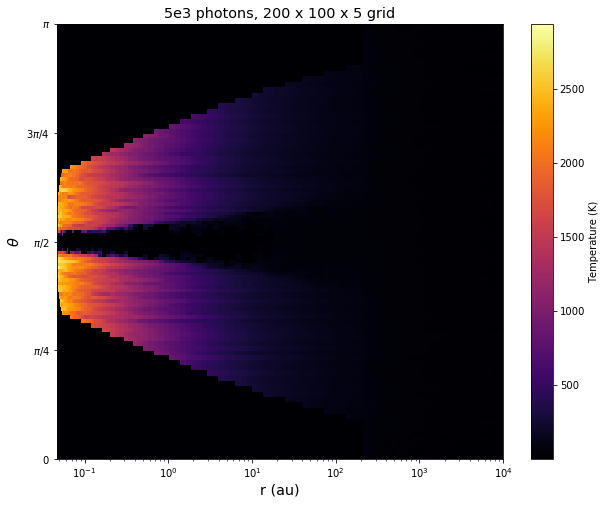

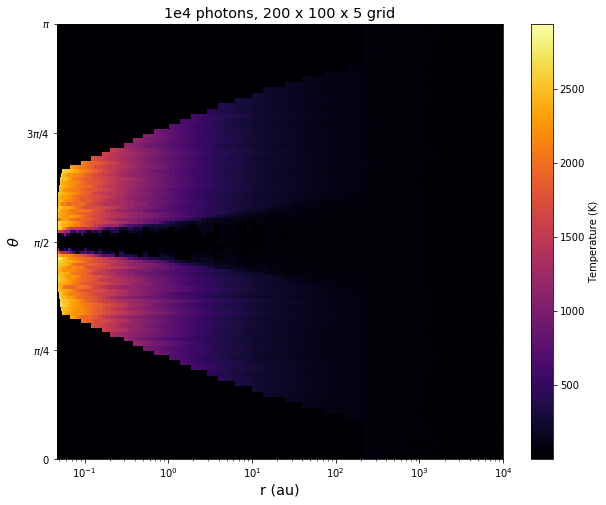

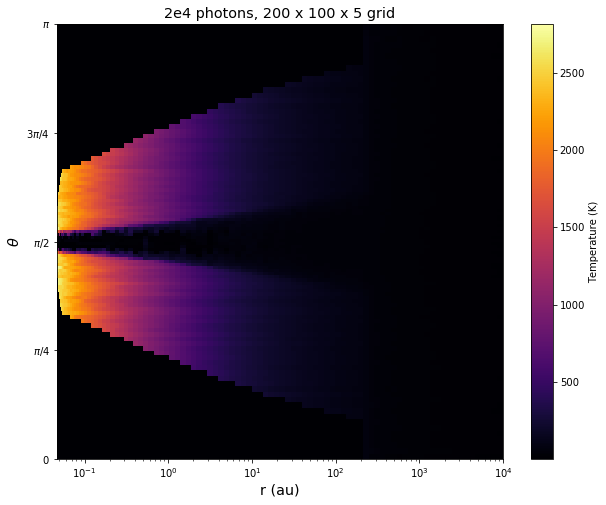

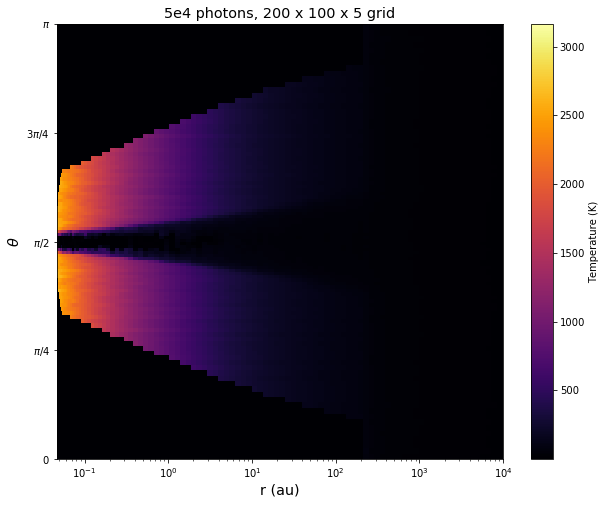

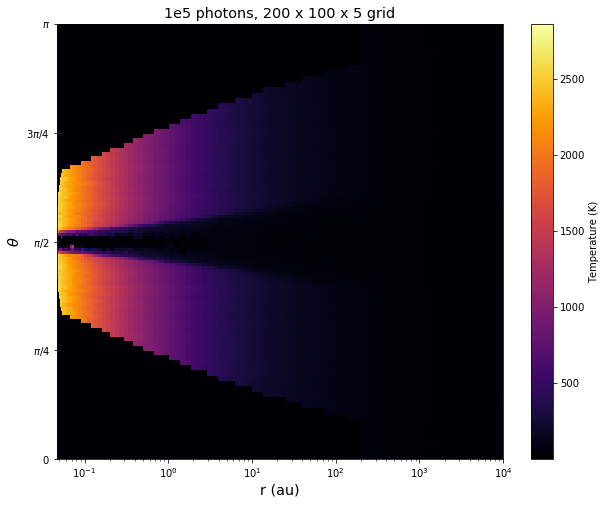

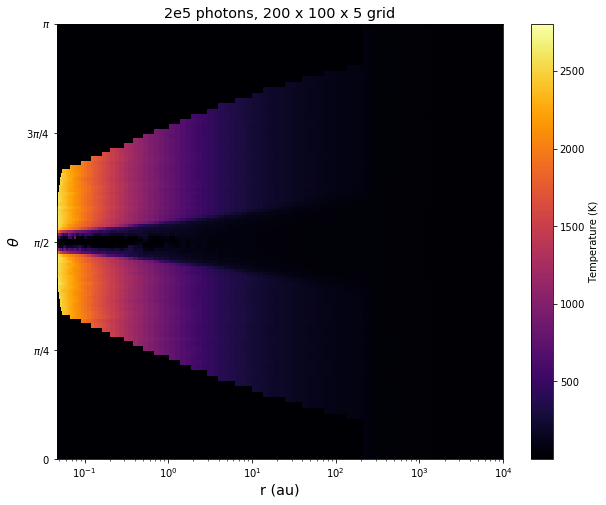

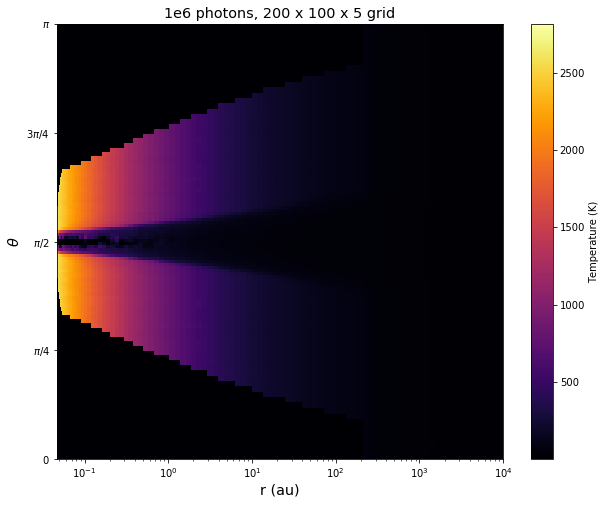

In [18]:
# Fixed 200 x 100 x 5 grid; vary number of photons; check for smoothness. 

fnames = ['yso_1e3_200_100_5.rtout', 'yso_2e3_200_100_5.rtout', 'yso_5e3_200_100_5.rtout',
          'yso_1e4_200_100_5.rtout', 'yso_2e4_200_100_5.rtout', 'yso_5e4_200_100_5.rtout',
          'yso_1e5_200_100_5_mrw.rtout', 'yso_2e5_200_100_5_mrw.rtout', 'yso_1e6_200_100_5_mrw.rtout']

titles = ['1e3 photons, 200 x 100 x 5 grid', '2e3 photons, 200 x 100 x 5 grid', 
          '5e3 photons, 200 x 100 x 5 grid', '1e4 photons, 200 x 100 x 5 grid', 
          '2e4 photons, 200 x 100 x 5 grid', '5e4 photons, 200 x 100 x 5 grid',
          '1e5 photons, 200 x 100 x 5 grid', '2e5 photons, 200 x 100 x 5 grid', 
          '1e6 photons, 200 x 100 x 5 grid']

for fname, title in zip(fnames, titles):
    
    fname_in = os.path.join(basedir, fname)
    plot_temperature(fname_in, title)

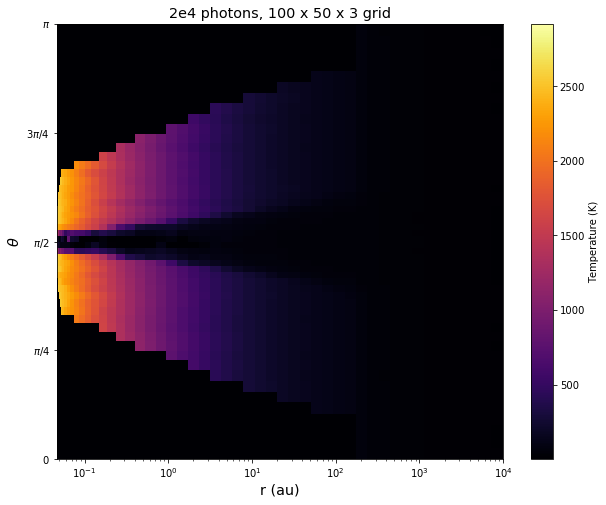

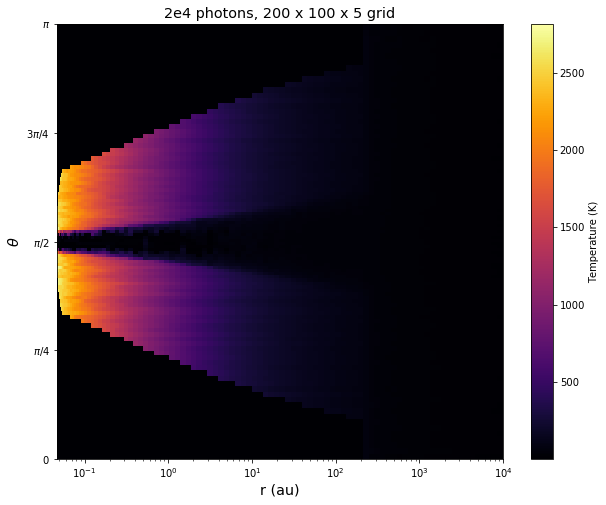

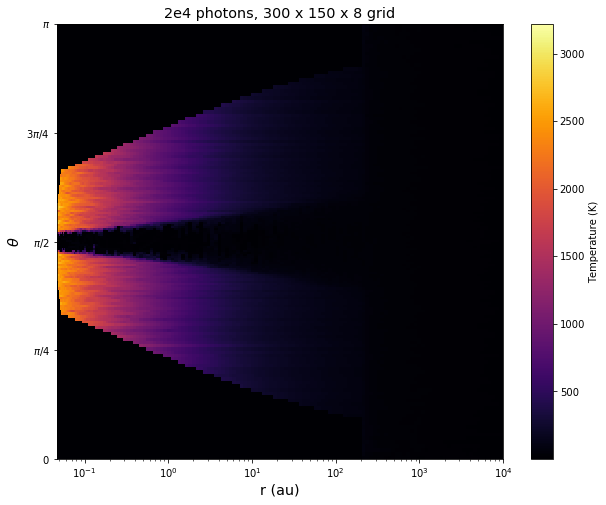

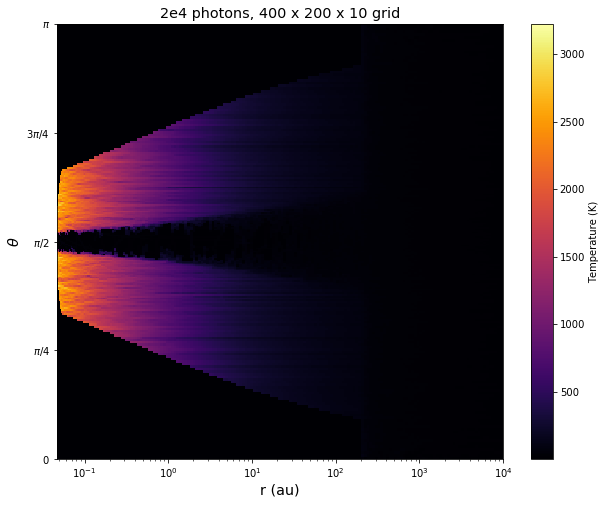

In [19]:
# Vary grid resolution.

fnames = ['yso_2e4_100_50_3_mrw.rtout', 'yso_2e4_200_100_5.rtout', 'yso_2e4_300_150_8_mrw.rtout',
          'yso_2e4_400_200_10_mrw.rtout']

titles = ['2e4 photons, 100 x 50 x 3 grid', '2e4 photons, 200 x 100 x 5 grid', 
          '2e4 photons, 300 x 150 x 8 grid', '2e4 photons, 400 x 200 x 10 grid']

for fname, title in zip(fnames, titles):
    
    fname_in = os.path.join(basedir, fname)
    plot_temperature(fname_in, title)

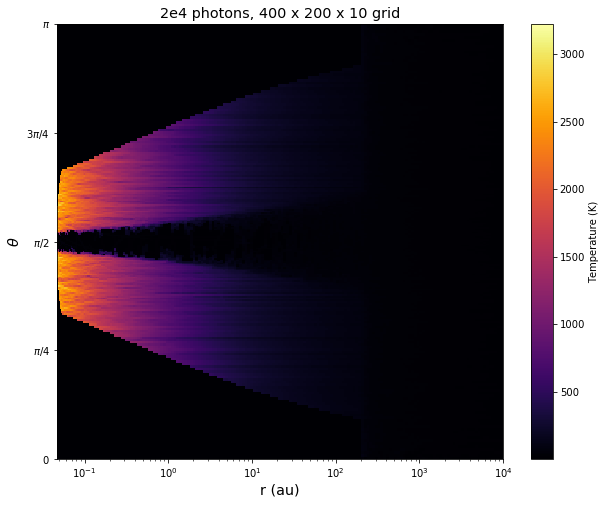

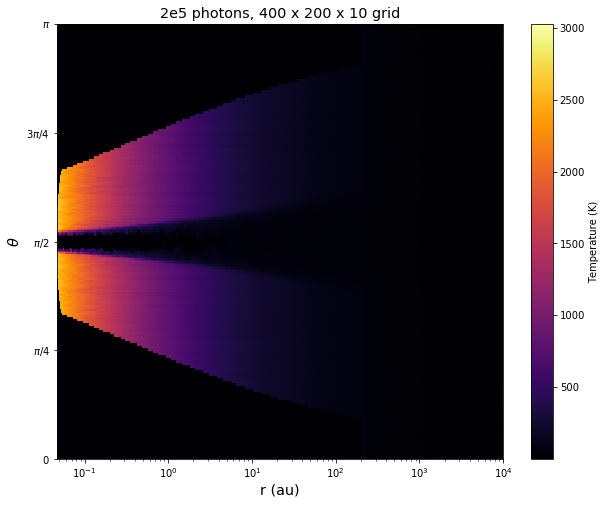

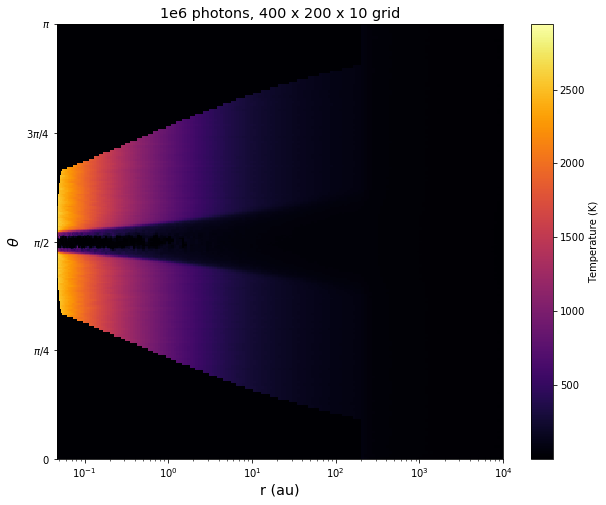

In [21]:
# 400 x 200x 10 grid, vary number of photons.

fnames = ['yso_2e4_400_200_10_mrw.rtout', 'yso_2e5_400_200_10_mrw.rtout',
          'yso_1e6_400_200_10_mrw.rtout']

titles = ['2e4 photons, 400 x 200 x 10 grid', '2e5 photons, 400 x 200 x 10 grid',
          '1e6 photons, 400 x 200 x 10 grid']

for fname, title in zip(fnames, titles):
    
    fname_in = os.path.join(basedir, fname)
    plot_temperature(fname_in, title)

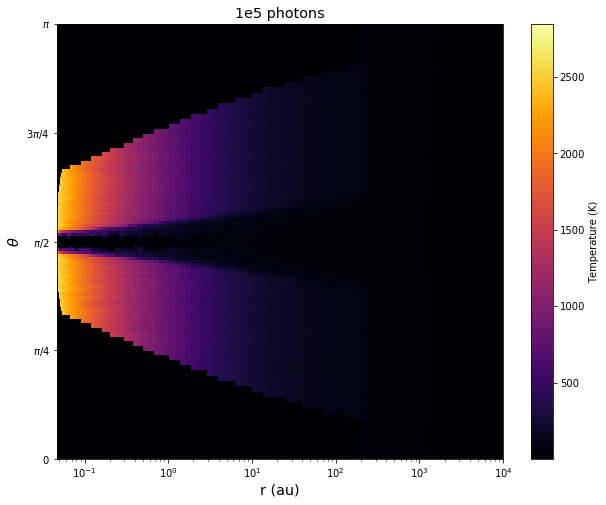

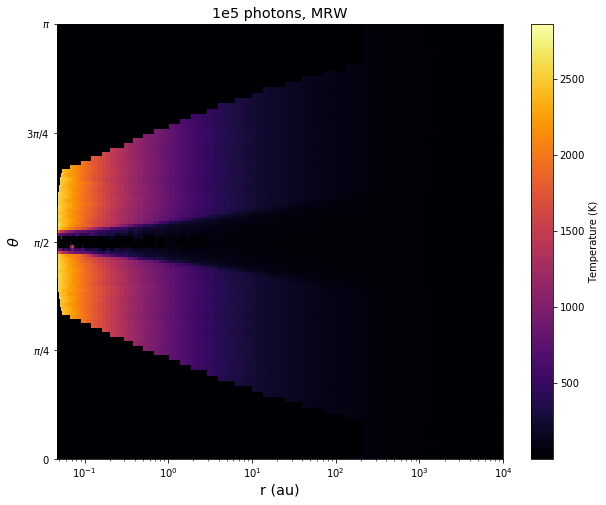

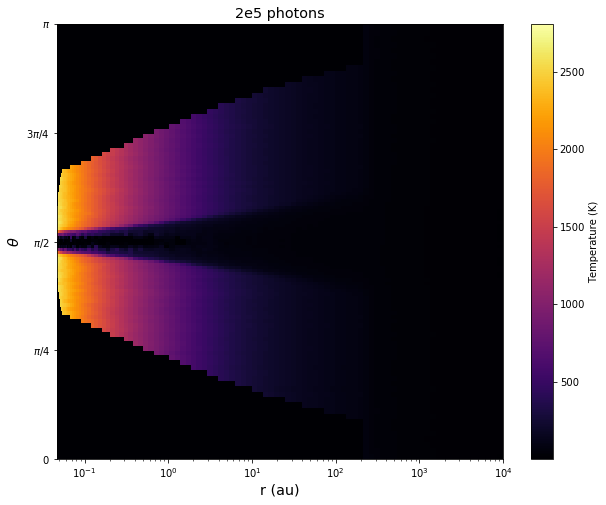

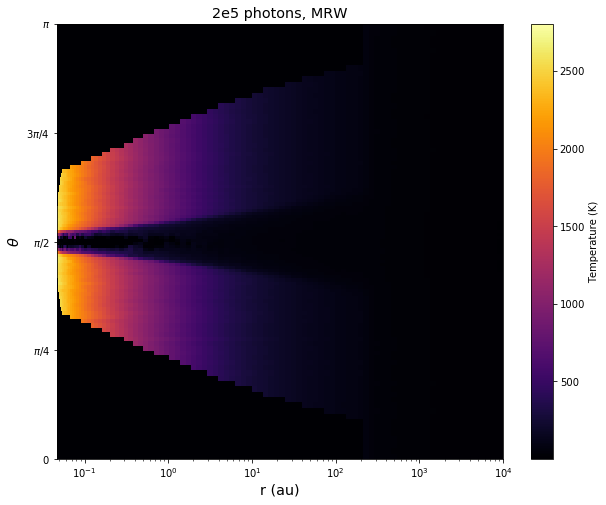

In [24]:
# MRW vs non-MRW.

fnames = ['yso_1e5_200_100_5.rtout', 'yso_1e5_200_100_5_mrw.rtout',
          'yso_2e5_200_100_5.rtout', 'yso_2e5_200_100_5_mrw.rtout']

titles = ['1e5 photons', '1e5 photons, MRW', '2e5 photons', '2e5 photons, MRW']

for fname, title in zip(fnames, titles):
    
    fname_in = os.path.join(basedir, fname)
    plot_temperature(fname_in, title)